In [1]:
import pandas as pd
import numpy as np

firmo = pd.read_csv("Firmographic_Information-0.csv")
financial = pd.read_csv("Financials_Annual_-0.csv")
firmo.loc[:,["BQ_ID","BQ_COMPANY_NAME","BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_ZIP9"]].loc[firmo["BQ_ID"] == 100009211630]

,BQ_ID,BQ_COMPANY_NAME,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_ZIP9
5216,100009211630,US NUCLEAR CORP.,NaN,NaN


# Création du dataset join, financial & firmographic 

In [2]:
firmo["BQ_COMPANY_ADDRESS1_ZIP5"].isna().sum()

np.int64(186)

### On a 186 valeurs manquantes pour le zip sur 5302 entreprises 

In [3]:
firmo.loc[firmo["BQ_COMPANY_ADDRESS1_ZIP5"].isna()].loc[:,["BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_LINE_1","BQ_COMPANY_ADDRESS1_CITY","BQ_COMPANY_ADDRESS1_STATE"]]

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_LINE_1,BQ_COMPANY_ADDRESS1_CITY,BQ_COMPANY_ADDRESS1_STATE
79,NaN,NaN,Las Vegas,NV
118,NaN,"New Castle, DE",NaN,No State Reported
148,NaN,"New Castle, DE",NaN,No State Reported
149,NaN,Care of Citius Pharmaceuticals Cranford,NaN,No State Reported
167,NaN,NaN,NaN,TX
...,...,...,...,...
4822,NaN,"New Castle, DE",NaN,No State Reported
4970,NaN,NaN,Garden City,NY
5155,NaN,NaN,NaN,NY
5216,NaN,NaN,NaN,CA


Mais on pourra dans le futur recrée ces valeurs manquantes à partir d'autres colonnes comme address, city ou state. 

Pour l'instant je décide de les drop

In [4]:
firmo = firmo.dropna(subset=["BQ_COMPANY_ADDRESS1_ZIP5"], axis='index')
firmo.loc[:,["BQ_ID","BQ_COMPANY_NAME","BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_ZIP9"]].sample(5)

,BQ_ID,BQ_COMPANY_NAME,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_ZIP9
1671,100004329881,INTEGRATED BIOPHARMA INC,7205.0,07205-2354
1741,100005660712,"MDWERKS, INC.",19801.0,19801-1145
185,100002344521,CYTODYN INC.,98660.0,98660-2970
2890,100003589783,"GLOBAL SELF STORAGE, INC.",21093.0,21093-5611
506,100006494853,PACIFIC FINANCIAL CORP,98520.0,98520-1067


In [5]:
df = (financial.set_index("BQ_ID").join(firmo.loc[:,["BQ_ID","BQ_COMPANY_NAME","BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_ZIP9"]].set_index("BQ_ID"), rsuffix="firmo")).reset_index()
df = df.dropna(subset=["BQ_COMPANY_ADDRESS1_ZIP5"], axis='index')
df.sample(3)

,BQ_ID,BQ_COMPANY_NAME,BQ_WEBSITE,BQ_YEAR,BQ_REVENUE,BQ_EBITDA,BQ_COR,BQ_NET_INCOME,BQ_GROSS_PROFIT,BQ_TOTAL_ASSETS,...,BQ_TOTAL_DEBT,BQ_TOTAL_LIABILITIES,BQ_SHAREHOLDERS_EQUITY,BQ_TOTAL_LIABILITIES_AND_EQUITY,BQ_CURRENT_RATIO,BQ_QUICK_RATIO,BQ_DEBT_TO_EQUITY_RATIO,BQ_COMPANY_NAMEfirmo,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_ZIP9
8616,100047068803,NORTHRIM BANCORP INC,https://www.northrim.com/,2017,9.495200e+07,27773000.0,0.0,13478000.0,94952000.0,1.518596e+09,...,45418000.0,1.325794e+09,192802000.0,1.325794e+09,1.082719,0.036739,0.235568,NORTHRIM BANCORP INC,99503.0,99503-3901
23887,100068994493,"APPYEA, INC",https://www.sleepxclear.com,2016,2.119110e+05,20498.0,98611.0,9186.0,113300.0,1.239930e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"APPYEA, INC",76102.0,76102-5368
25985,100001564296,TOPGOLF CALLAWAY BRANDS CORP,https://www.callawaygolf.com/,2018,1.242834e+09,156169000.0,664465000.0,105254000.0,578369000.0,1.052944e+09,...,47518000.0,3.186360e+08,734308000.0,3.186360e+08,1.731009,0.446367,0.064711,TOPGOLF CALLAWAY BRANDS CORP,92008.0,92008-7328


## Les colonnes qui vont nous intéresser sont :

In [6]:
df.columns

Index(['BQ_ID', 'BQ_COMPANY_NAME', 'BQ_WEBSITE', 'BQ_YEAR', 'BQ_REVENUE',
       'BQ_EBITDA', 'BQ_COR', 'BQ_NET_INCOME', 'BQ_GROSS_PROFIT',
       'BQ_TOTAL_ASSETS', 'BQ_OPERATING_EXPENSES', 'BQ_OPERATING_INCOME',
       'BQ_TAX_AND_INTEREST', 'BQ_GROSS_PROFIT_MARGIN', 'BQ_EBITDA_MARGIN',
       'BQ_ASSET_TURNOVER', 'BQ_NET_PROFIT_MARGIN', 'BQ_RETURN_ON_ASSETS',
       'BQ_RETURN_ON_SALES', 'BQ_REVENUE_PER_EMP', 'BQ_EBITDA_PER_EMP',
       'BQ_COR_PER_EMP', 'BQ_NET_INCOME_PER_EMP', 'BQ_GROSS_PROFIT_PER_EMP',
       'BQ_TOTAL_ASSETS_PER_EMP', 'BQ_PAYROLL_PER_EMP',
       'BQ_OPERATING_EXPENSES_PER_EMP', 'BQ_OPERATING_INCOME_PER_EMP',
       'BQ_TAX_AND_INTEREST_PER_EMP', 'BQ_FISCAL_YEAR_END',
       'BQ_CURRENT_ASSETS', 'BQ_CASH',
       'BQ_TRADE_NOTES_AND_ACCOUNTS_RECEIVABLE',
       'BQ_LESS_ALLOWANCE_FOR_BAD_DEBTS', 'BQ_INVENTORIES',
       'BQ_US_GOVERNMENT_OBLIGATIONS', 'BQ_TAX_EXEMPT_SECURITIES',
       'BQ_OTHER_CURRENT_ASSETS', 'BQ_NON_CURRENT_ASSETS',
       'BQ_LOANS_TO_SHARE

In [7]:
features = ['BQ_COMPANY_NAME', 'BQ_YEAR','BQ_TOTAL_ASSETS','BQ_CURRENT_ASSETS', 'BQ_OTHER_NON_CURRENT_ASSETS' 
            ,'BQ_CASH', 'BQ_US_GOVERNMENT_OBLIGATIONS',
            'BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS', 'BQ_LAND',"BQ_DEPLETABLE_ASSETS",
            'BQ_INTANGIBLE_ASSETS_AMORTIZABLE','BQ_TOTAL_DEBT', 'BQ_MORTGAGE_AND_REAL_ESTATE_LOANS']

In [8]:
df[features].loc[df["BQ_COMPANY_NAME"] == "MICROSOFT CORP"]

,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_CURRENT_ASSETS,BQ_OTHER_NON_CURRENT_ASSETS,BQ_CASH,BQ_US_GOVERNMENT_OBLIGATIONS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_LAND,BQ_DEPLETABLE_ASSETS,BQ_INTANGIBLE_ASSETS_AMORTIZABLE,BQ_TOTAL_DEBT,BQ_MORTGAGE_AND_REAL_ESTATE_LOANS
47310,MICROSOFT CORP,2024,4.842750e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47311,MICROSOFT CORP,2023,4.705580e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47312,MICROSOFT CORP,2022,4.119760e+11,1.842570e+11,NaN,3.470400e+10,NaN,1.099870e+11,NaN,NaN,7.725200e+10,NaN,NaN
47313,MICROSOFT CORP,2021,3.648400e+11,1.696840e+11,NaN,1.393100e+10,NaN,8.754600e+10,NaN,NaN,7.882200e+10,NaN,NaN
47314,MICROSOFT CORP,2020,3.337790e+11,1.844060e+11,NaN,1.422400e+10,NaN,7.080300e+10,NaN,NaN,5.751100e+10,NaN,NaN
47315,MICROSOFT CORP,2019,3.013110e+11,1.819150e+11,NaN,1.357600e+10,NaN,5.290400e+10,NaN,NaN,5.038900e+10,NaN,NaN
47316,MICROSOFT CORP,2018,2.865560e+11,1.755520e+11,NaN,1.135600e+10,NaN,4.385600e+10,NaN,NaN,4.977600e+10,NaN,NaN
47317,MICROSOFT CORP,2017,2.588480e+11,1.696620e+11,NaN,1.194600e+10,NaN,3.614600e+10,NaN,NaN,4.373600e+10,7.224200e+10,NaN
47318,MICROSOFT CORP,2016,2.503120e+11,1.626960e+11,NaN,7.663000e+09,NaN,3.028900e+10,NaN,NaN,4.522800e+10,8.514500e+10,NaN
47319,MICROSOFT CORP,2015,1.934680e+11,1.396600e+11,NaN,6.510000e+09,NaN,1.835600e+10,NaN,NaN,2.160500e+10,5.346100e+10,NaN


'BQ_OTHER_NON_CURRENT_ASSETS' : 66 000 valeurs manquantes sur 66283\
'BQ_US_GOVERNMENT_OBLIGATIONS' : 66233 valeurs manquantes sur 66283\
BQ_LAND : 66233 valeurs manquantes sur 66283\
BQ_DEPLETABLE_ASSETS : 66233 valeurs manquantes sur 66283\
BQ_TOTAL_DEBT : 52580 valeurs manquantes sur 662283 \
BQ_MORTGAGE_AND_REAL_ESTATE_LOANS : 66233 valeurs manquantes sur 66283

In [9]:
df["BQ_TOTAL_ASSETS"].isna().sum()

np.int64(1385)

In [10]:
1.147150e+08	/ 3.409779e+09	

0.03364294284175016

<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

#### <o> Pas mal de valeurs manquantes : idée -> créer des variables agrégés TANGIBLE (immobilier, inventaire, mobilier ..) vs INTANGIBLE (stock, cash, debt..) <\o>
<g> 1ère solution : régresser la proportion de 'BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS' parmis 'BQ_TOTAL_ASSETS' sur les variables climatiques qui nous intéresse


In [11]:
aggreg = df.loc[:,['BQ_COMPANY_NAME', 'BQ_YEAR',"BQ_TOTAL_ASSETS","BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS", 'BQ_COMPANY_ADDRESS1_ZIP5']].dropna(how='all', subset=['BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS'])
aggreg["building_among_total"] = aggreg['BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS'] / aggreg['BQ_TOTAL_ASSETS']
aggreg = aggreg.dropna(how='all', subset=['BQ_TOTAL_ASSETS'])
aggreg = aggreg.loc[(aggreg["building_among_total"]<=1) & (aggreg["building_among_total"]>=0)]
aggreg.sample(5)

,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_COMPANY_ADDRESS1_ZIP5,building_among_total
15449,UGI CORP,2015,1.051420e+10,4.994100e+09,17517.0,0.474986
42289,INVITAE CORP,2014,1.287780e+08,1.567200e+07,94103.0,0.121698
28150,"CINCINNATI BANCORP, INC.",2020,2.371336e+08,3.667826e+06,21202.0,0.015467
50452,OCEANEERING INTERNATIONAL INC,2011,2.400544e+09,8.933080e+08,77086.0,0.372127
18097,BAKER HUGHES CO,2019,5.336900e+10,7.069000e+09,77210.0,0.132455


In [12]:
aggreg.describe()

,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_COMPANY_ADDRESS1_ZIP5,building_among_total
count,47220.000000,4.722000e+04,4.722000e+04,47220.000000,47220.000000
mean,2017.193795,1.395674e+10,2.067168e+09,50396.114083,0.223163
std,3.935043,1.103666e+11,9.217111e+09,32984.137645,0.257046
min,2010.000000,3.000000e+00,0.000000e+00,745.000000,0.000000
25%,2014.000000,1.040941e+08,7.181000e+06,19406.000000,0.030184
50%,2018.000000,8.860576e+08,7.434900e+07,48320.000000,0.114948
75%,2021.000000,4.312068e+09,6.671958e+08,80301.000000,0.321993
max,2023.000000,4.325437e+12,2.766900e+11,99701.000000,1.000000


Recall : **Current Assets** = Annual time series based current assets value which accounts for all company-owned assets that can be converted to cash within one year. Current assets include cash, cash equivalents, accounts receivable, stock inventory, marketable securities, pre-paid liabilities, and other liquid assets.

In [13]:
aggreg.loc[aggreg["BQ_COMPANY_ADDRESS1_ZIP5"] == 94539.0]

,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_COMPANY_ADDRESS1_ZIP5,building_among_total
4534,ACM RESEARCH INC.,2023,1.490908e+09,208874000.0,94539.0,0.140099
4535,ACM RESEARCH INC.,2022,1.235500e+09,85364000.0,94539.0,0.069093
4536,ACM RESEARCH INC.,2021,1.052179e+09,18224000.0,94539.0,0.017320
4537,ACM RESEARCH INC.,2020,3.412570e+08,12489000.0,94539.0,0.036597
4538,ACM RESEARCH INC.,2019,2.177030e+08,7506000.0,94539.0,0.034478
4539,ACM RESEARCH INC.,2018,1.030470e+08,3708000.0,94539.0,0.035984
4540,ACM RESEARCH INC.,2017,6.789100e+07,2340000.0,94539.0,0.034467
4541,ACM RESEARCH INC.,2016,4.446700e+07,2262000.0,94539.0,0.050869
4600,ACTELIS NETWORKS INC,2023,1.122300e+07,979000.0,94539.0,0.087232
4601,ACTELIS NETWORKS INC,2022,1.481900e+07,806000.0,94539.0,0.054390


# Joindre les données climatiques via le ZIP code

In [117]:
climate = pd.read_csv("U_S_Climate_Risk_Data-0.csv")
climate

,STATE,ZIP,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
0,Massachusetts,1001,65,91.5,73.4,90.4,90.4,90.8,91.0,91.1,...,0,0,0,0,0,0,0,0,0,0
1,Massachusetts,1002,60,89.6,71.3,88.6,88.6,89.0,89.2,89.3,...,0,0,0,0,0,0,0,0,0,0
2,Massachusetts,1003,61,90.3,71.8,89.2,89.2,89.6,89.9,89.9,...,0,0,0,0,0,0,0,0,0,0
3,Massachusetts,1005,54,87.6,69.7,86.4,86.5,86.8,87.1,87.2,...,0,0,0,0,0,0,0,0,0,0
4,Massachusetts,1007,61,89.4,71.2,88.3,88.3,88.7,89.0,89.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33295,Washington,99363,46,97.7,67.6,96.0,96.4,96.8,97.1,97.2,...,0,0,0,0,0,0,0,0,0,0
33296,Washington,99371,45,97.8,65.7,96.1,96.6,96.9,97.2,97.2,...,0,0,0,0,0,0,0,0,0,0
33297,Washington,99401,45,92.2,66.3,90.6,91.1,91.3,91.6,91.6,...,0,0,0,0,0,0,0,0,0,0
33298,Washington,99402,48,94.3,67.2,92.7,93.1,93.4,93.7,93.7,...,0,0,0,0,0,0,0,0,0,0


In [15]:
list(climate.columns)

['STATE',
 'ZIP',
 'HEAT_RATING',
 'HEAT_THRESHOLD_F',
 'HEAT_WETBULB_THRESHOLD_F',
 'HEAT_MAGNITUDE_1970_F',
 'HEAT_MAGNITUDE_1975_F',
 'HEAT_MAGNITUDE_1980_F',
 'HEAT_MAGNITUDE_1985_F',
 'HEAT_MAGNITUDE_1990_F',
 'HEAT_MAGNITUDE_1995_F',
 'HEAT_MAGNITUDE_2000_F',
 'HEAT_MAGNITUDE_2005_RCP45_F',
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',
 'HEAT_MAGNITUDE_2030_RCP45_F',
 'HEAT_MAGNITUDE_2035_RCP45_F',
 'HEAT_MAGNITUDE_2040_RCP45_F',
 'HEAT_MAGNITUDE_2045_RCP45_F',
 'HEAT_MAGNITUDE_2050_RCP45_F',
 'HEAT_MAGNITUDE_2055_RCP45_F',
 'HEAT_MAGNITUDE_2060_RCP45_F',
 'HEAT_MAGNITUDE_2005_RCP85_F',
 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',
 'HEAT_MAGNITUDE_2030_RCP85_F',
 'HEAT_MAGNITUDE_2035_RCP85_F',
 'HEAT_MAGNITUDE_2040_RCP85_F',
 'HEAT_MAGNITUDE_2045_RCP85_F',
 'HEAT_MAGNITUDE_2050_RCP85_F',
 'HEAT_MAGNITUDE_2055_RCP85_F'

In [16]:
climate.loc[climate["ZIP"] == 94539]

,STATE,ZIP,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
31529,California,94539,26,89.7,61.4,88.5,88.8,89.0,89.2,89.1,...,9,7,3,11,8,4,12,10,6,13


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

<o> On va commencer par regarder la réallocation en fonction de la température\
<g> Changer features_heat ci-dessous pour changer les features disponibles pour la modélisation !

In [17]:
features_heat = list(climate.columns)

In [18]:
# change aggreg to df if you want all the features coming from financial dataframe
features_heat.remove("ZIP")
financ_with_clim = aggreg.set_index("BQ_COMPANY_ADDRESS1_ZIP5").join(climate.set_index("ZIP")[features_heat], how="inner").reset_index()
financ_with_clim.sample(5)

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,building_among_total,STATE,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
39020,10004.0,"SG BLOCKS, INC",2018,1.103917e+07,7.133700e+04,0.006462,New York,68,92.0,76.1,...,65,54,27,78,64,37,90,73,48,99
771,94109.0,WILLIAMS SONOMA INC,2016,2.476879e+09,9.232830e+08,0.372761,California,11,81.6,60.5,...,3,3,2,4,4,3,6,6,4,7
32925,78759.0,NATIONAL INSTRUMENTS CORP,2015,1.453856e+09,2.578530e+08,0.177358,Texas,98,100.5,79.6,...,0,0,0,0,0,0,0,0,0,0
9966,7102.0,BROADRIDGE FINANCIAL SOLUTIONS INC,2014,2.099800e+09,9.730000e+07,0.046338,New Jersey,68,92.6,75.7,...,21,24,20,27,31,27,34,37,34,40
8720,15219.0,WESCO INTERNATIONAL INC,2022,1.481170e+10,1.027800e+09,0.069391,Pennsylvania,75,90.9,74.4,...,0,0,0,0,0,0,0,0,0,0


In [19]:
financ_with_clim.isna().sum().sort_values()

FLOOD_TIDAL_EVENTS_2060        0
FLOOD_TIDAL_EVENTS_2050_P75    0
FLOOD_TIDAL_EVENTS_2050_P25    0
FLOOD_TIDAL_EVENTS_2050        0
FLOOD_TIDAL_EVENTS_2040_P75    0
                              ..
FLOOD_TIDAL_EVENTS_2090_P75    0
FLOOD_TIDAL_EVENTS_2100        0
FLOOD_TIDAL_EVENTS_2100_P25    0
FLOOD_TIDAL_EVENTS_2100_P75    0
BQ_COMPANY_ADDRESS1_ZIP5       0
Length: 446, dtype: int64

In [20]:
financ_with_clim

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,building_among_total,STATE,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
0,92009.0,VIASAT INC,2018,4.242149e+09,2.452619e+09,0.578155,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
1,92009.0,VIASAT INC,2017,3.414109e+09,1.962475e+09,0.574813,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
2,92009.0,VIASAT INC,2015,2.397312e+09,1.385107e+09,0.577775,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
3,92009.0,VIASAT INC,2012,1.794072e+09,3.786910e+08,0.211079,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
4,92009.0,VIASAT INC,2011,1.727153e+09,2.949730e+08,0.170786,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44940,92009.0,VIASAT INC,2023,1.632936e+10,7.950283e+09,0.486870,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
44941,92009.0,VIASAT INC,2022,7.730337e+09,4.660040e+09,0.602825,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
44942,92009.0,VIASAT INC,2021,6.389346e+09,4.048330e+09,0.633606,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6
44943,92009.0,VIASAT INC,2020,5.349467e+09,3.390939e+09,0.633884,California,37,91.0,62.9,...,1,2,2,2,4,4,4,6,6,6


In [21]:
######### FREE MEMORY ###########
del financial
del climate
del df
del aggreg

# Partie Modélisation

In [22]:
financ_with_clim.loc[financ_with_clim['BQ_COMPANY_NAME'] == "MICROSOFT CORP"]

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,building_among_total,STATE,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
31727,98052.0,MICROSOFT CORP,2022,4.119760e+11,1.099870e+11,0.266974,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31728,98052.0,MICROSOFT CORP,2021,3.648400e+11,8.754600e+10,0.239957,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31729,98052.0,MICROSOFT CORP,2020,3.337790e+11,7.080300e+10,0.212125,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31730,98052.0,MICROSOFT CORP,2019,3.013110e+11,5.290400e+10,0.175579,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31731,98052.0,MICROSOFT CORP,2018,2.865560e+11,4.385600e+10,0.153045,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31732,98052.0,MICROSOFT CORP,2017,2.588480e+11,3.614600e+10,0.139642,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31733,98052.0,MICROSOFT CORP,2016,2.503120e+11,3.028900e+10,0.121005,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31734,98052.0,MICROSOFT CORP,2015,1.934680e+11,1.835600e+10,0.094879,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31735,98052.0,MICROSOFT CORP,2014,1.744720e+11,1.473100e+10,0.084432,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0
31736,98052.0,MICROSOFT CORP,2013,1.723840e+11,1.301100e+10,0.075477,Washington,47,84.5,63.8,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from statsmodels.tsa.stattools import adfuller

for name, group in financ_with_clim.groupby('BQ_COMPANY_NAME'):
    series = group.sort_values('BQ_YEAR')['building_among_total'].dropna()
    if len(series) > 4:  # pour éviter les séries trop courtes
        result = adfuller(series)
        print(f"{name}: p-value = {result[1]}")


1 800 FLOWERS COM INC: p-value = 0.505167571551876
10X GENOMICS INC: p-value = 0.8859771000008914
111, INC: p-value = 0.25557270555226697
1LIFE HEALTHCARE INC: p-value = 0.16768045990342934
1ST SOURCE CORP: p-value = 0.20020513856494576
22ND CENTURY GROUP INC: p-value = 0.26158119112994194
2U INC: p-value = 4.7144327250427434e-07
3D SYSTEMS CORP: p-value = 0.4118398786250189
4D MOLECULAR THERAPEUTICS, INC: p-value = 0.5106990925562768
4FRONT VENTURES CORP.: p-value = 0.9168205209008395
89BIO, INC.: p-value = 0.0006219044627986055
8X8 INC: p-value = 0.13461041876203417
9 METERS BIOPHARMA, INC.: p-value = 0.1688625241928816
A-MARK PRECIOUS METALS INC: p-value = 6.274900304414911e-10
A. M. CASTLE & CO.: p-value = 0.7129617893885705
A10 NETWORKS INC: p-value = 0.514373096893765
AADI BIOSCIENCE, INC: p-value = 0.41273369709618934
AAON INC: p-value = 0.001691018305723879
AAR CORP: p-value = 0.16943787800047766
AARON'S COMPANY INC: p-value = 0.018381068884052595
ABBOTT LABORATORIES: p-value =

On a de grande chance que la série $Y_{it}$ ne soient pas stationnaire car on ne peut pas rejetter la présence d'une racine unitaire dans la plupart des cas, ce qui renforce notre envie de différencier $\Delta Y_{it} $

In [24]:
financ_with_clim["BQ_YEAR"].value_counts()

BQ_YEAR
2021    4046
2020    3973
2022    3960
2023    3715
2019    3643
2018    3457
2017    3331
2016    3148
2015    2952
2014    2819
2013    2671
2012    2526
2011    2428
2010    2276
Name: count, dtype: int64

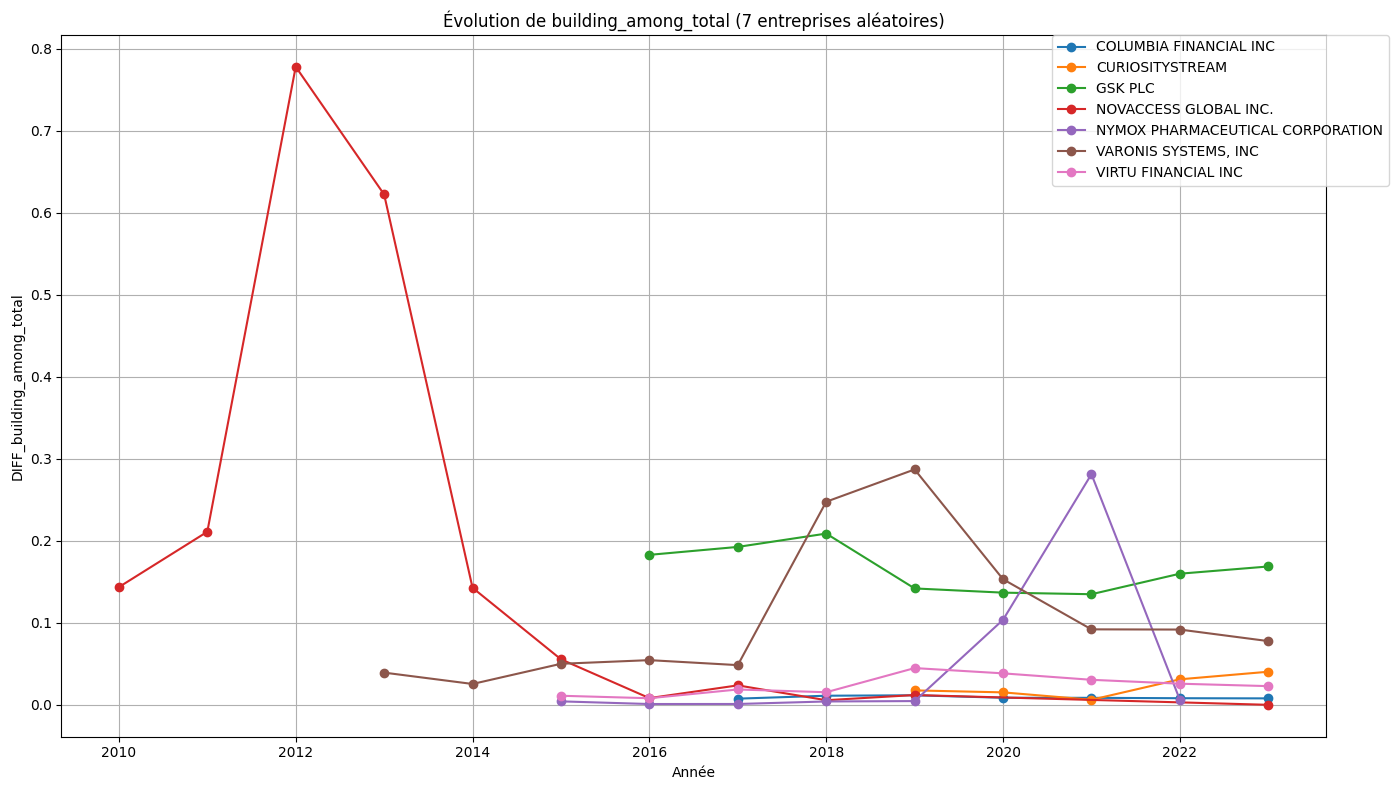

In [88]:
sample_companies = financ_with_clim['BQ_COMPANY_NAME'].dropna().unique()
sample_10 = pd.Series(sample_companies).sample(7)

# Filtrer les données
df_sample = financ_with_clim[financ_with_clim['BQ_COMPANY_NAME'].isin(sample_10)]

# Tracer les courbes
plt.figure(figsize=(14, 8))
for company, group in df_sample.groupby('BQ_COMPANY_NAME'):
    group_sorted = group.sort_values('BQ_YEAR')
    plt.plot(group_sorted['BQ_YEAR'], (group_sorted['building_among_total']),
             marker='o', label=company)

# Mise en forme
plt.title("Évolution de building_among_total (7 entreprises aléatoires)")
plt.xlabel("Année")
plt.ylabel("DIFF_building_among_total")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

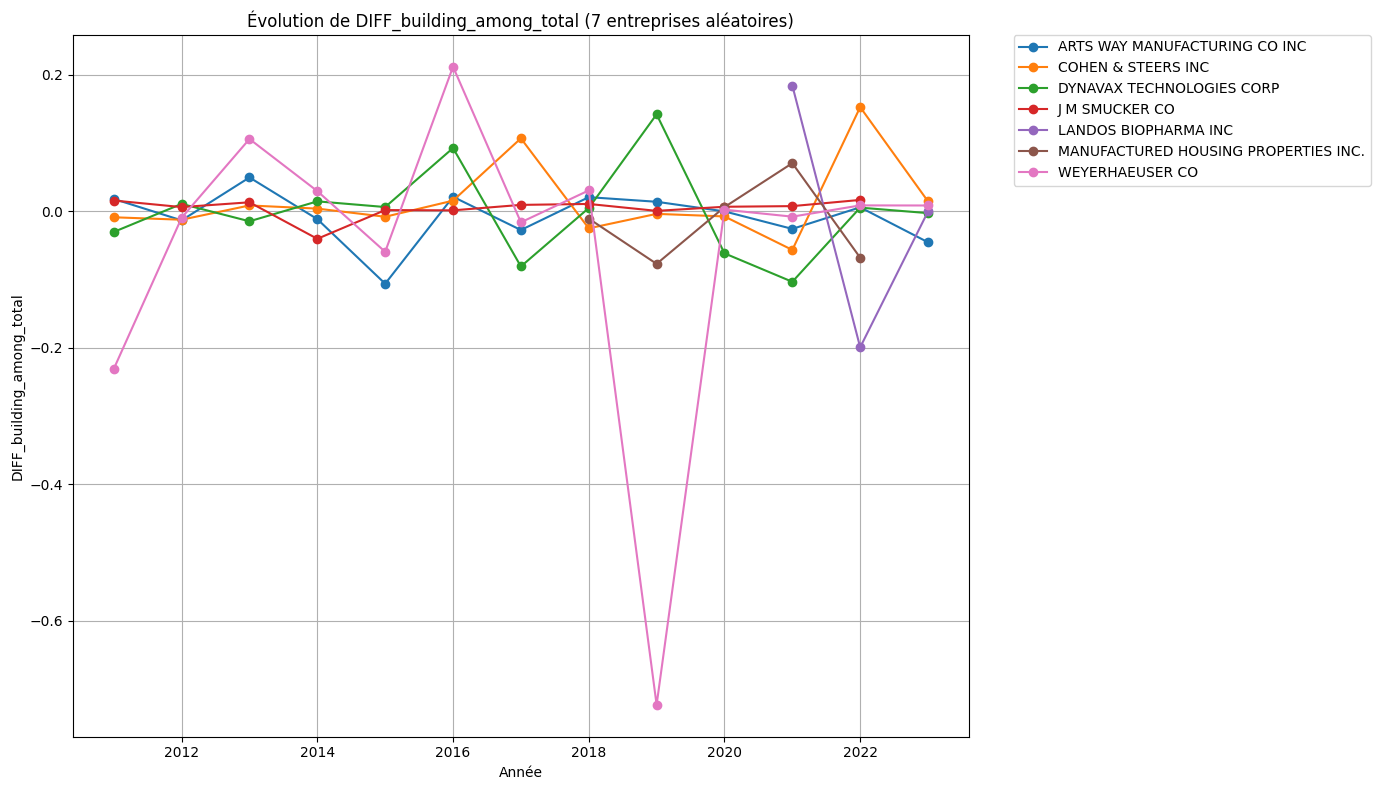

In [89]:
df = financ_with_clim.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = [

    'building_among_total'
]

# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()

# Tu peux afficher les nouvelles colonnes pour vérifier
tmp = df.dropna(subset='DIFF_building_among_total')
del df

sample_companies = tmp['BQ_COMPANY_NAME'].dropna().unique()
sample_10 = pd.Series(sample_companies).sample(7)

# Filtrer les données
df_sample = tmp[tmp['BQ_COMPANY_NAME'].isin(sample_10)]

# Tracer les courbes
plt.figure(figsize=(14, 8))
for company, group in df_sample.groupby('BQ_COMPANY_NAME'):
    group_sorted = group.sort_values('BQ_YEAR')
    plt.plot(group_sorted['BQ_YEAR'], group_sorted['DIFF_building_among_total'],
             marker='o', label=company)

# Mise en forme
plt.title("Évolution de DIFF_building_among_total (7 entreprises aléatoires)")
plt.xlabel("Année")
plt.ylabel("DIFF_building_among_total")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
from statsmodels.tsa.stattools import adfuller

for name, group in tmp.groupby('BQ_COMPANY_NAME'):
    series = group.sort_values('BQ_YEAR')['DIFF_building_among_total'].dropna()
    if len(series) > 4:  # pour éviter les séries trop courtes
        result = adfuller(series)
        print(f"{name}: p-value = {result[1]}")

1 800 FLOWERS COM INC: p-value = 0.012289563960962532
111, INC: p-value = 0.989718865869496
1ST SOURCE CORP: p-value = 2.765941812877599e-07
22ND CENTURY GROUP INC: p-value = 0.0
2U INC: p-value = 3.7129541299271497e-07
3D SYSTEMS CORP: p-value = 0.00869335074261058
89BIO, INC.: p-value = 0.907110909426257
8X8 INC: p-value = 0.0031818850845670267
9 METERS BIOPHARMA, INC.: p-value = 0.0974361341223634
A-MARK PRECIOUS METALS INC: p-value = 0.05560671911817622
A. M. CASTLE & CO.: p-value = 0.009447612297864966
A10 NETWORKS INC: p-value = 0.033720971464157125
AADI BIOSCIENCE, INC: p-value = 1.0
AAON INC: p-value = 0.4093345070797489
AAR CORP: p-value = 0.0007168366566105084
ABBOTT LABORATORIES: p-value = 0.9332108032458606
ABBVIE INC: p-value = 0.18677439871089957
ABEONA THERAPEUTICS INC: p-value = 0.4104846052506148
ABERCROMBIE & FITCH CO: p-value = 0.2538427761363523
ABM INDUSTRIES INC: p-value = 0.008951177937473773
ABRAXAS PETROLEUM CORP: p-value = 1.0780924960391698e-11
ABVC BIOPHARMA

<Axes: xlabel='BQ_YEAR'>

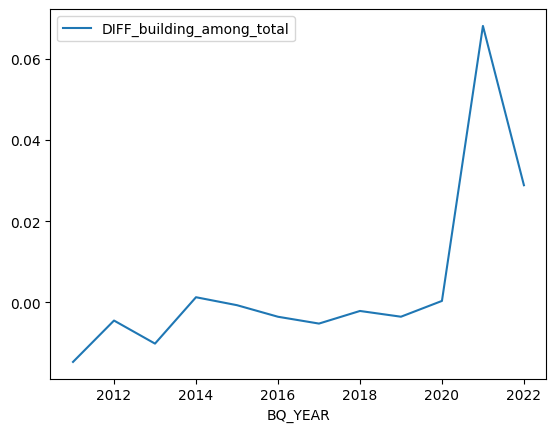

In [80]:
tmp.loc[tmp["BQ_COMPANY_NAME"] == "ZW DATA ACTION TECHNOLOGIES INC"][["BQ_YEAR","DIFF_building_among_total"]].plot(x="BQ_YEAR",y="DIFF_building_among_total")

c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


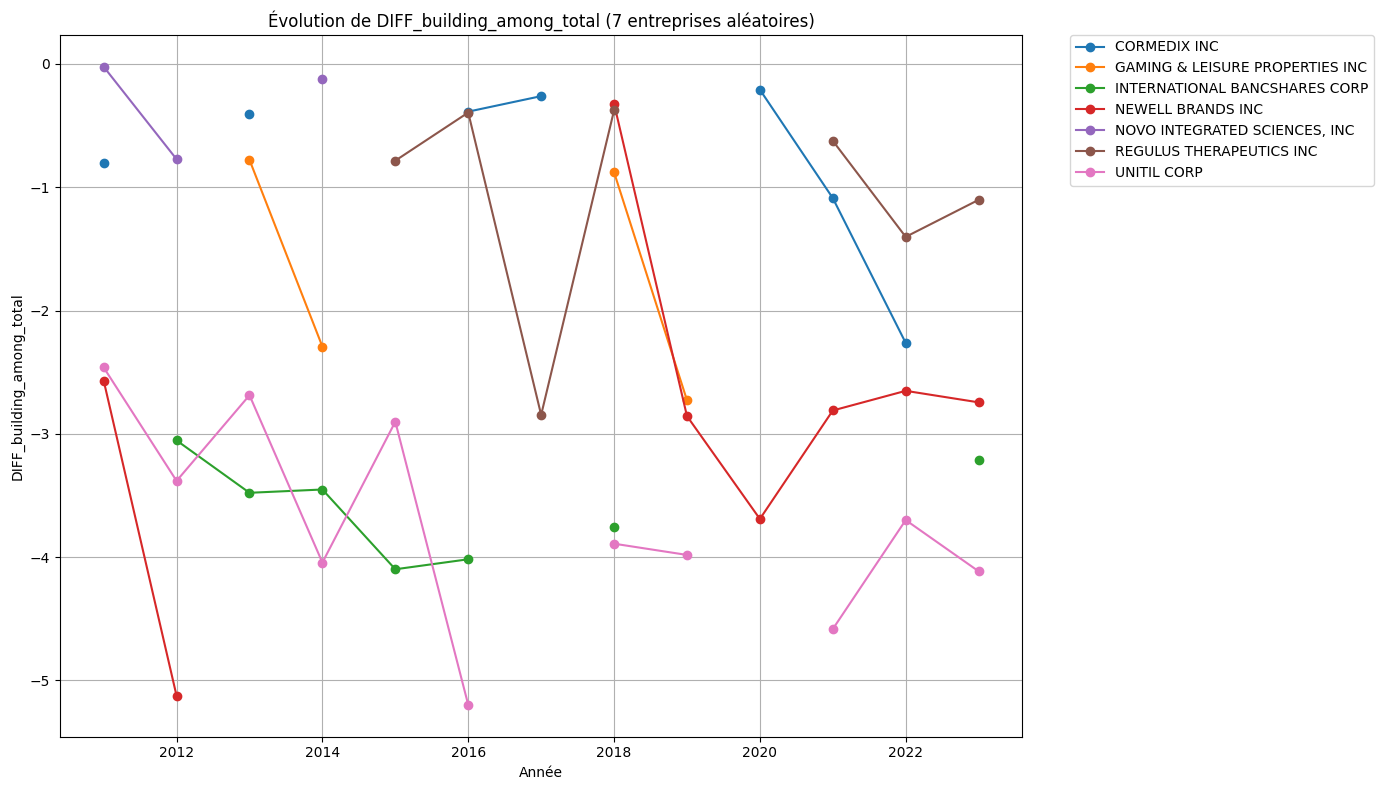

In [96]:
df = financ_with_clim.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = [

    'building_among_total'
]

# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()

# Tu peux afficher les nouvelles colonnes pour vérifier
tmp = df.dropna(subset='DIFF_building_among_total')
del df

sample_companies = tmp['BQ_COMPANY_NAME'].dropna().unique()
sample_10 = pd.Series(sample_companies).sample(7)

# Filtrer les données
df_sample = tmp[tmp['BQ_COMPANY_NAME'].isin(sample_10)]

# Tracer les courbes
plt.figure(figsize=(14, 8))
for company, group in df_sample.groupby('BQ_COMPANY_NAME'):
    group_sorted = group.sort_values('BQ_YEAR')
    plt.plot(group_sorted['BQ_YEAR'], np.log(group_sorted['DIFF_building_among_total']/group_sorted['building_among_total']),
             marker='o', label=company)

# Mise en forme
plt.title("Évolution de DIFF_building_among_total (7 entreprises aléatoires)")
plt.xlabel("Année")
plt.ylabel("DIFF_building_among_total")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
del tmp

#### Proposition de modélisation #1
- $Y_{it} = \text{'building\_among\_total' of firm i at date t} $

- $X_{it} = \begin{pmatrix} \text{heat magnitude firm i (so zip i) at date t} \\ \text{heat event firm i (so zip i) at date t} \end{pmatrix}$

- $t \in \left\{ 2010,2015,2020, 2023 \right\}$

- $i \in \text{les entreprises dont les valeurs financières sont disponibles en 2010,2015,2020 et 2023}$

$$ Y_{it} = X_{it}^{'}\beta_{0} + \alpha_{i} + \epsilon_{it}$$

Hypothèse : Stricte exogéneité, iid along the firm, $\mathbb{E}[\alpha_{i}] = 0$, $\mathbb{E}[\epsilon_{it}] = 0$

Procédure : $ \text{First Difference :}$ $$ \Delta Y_{it} = \Delta X_{it}^{'}\beta_{0} + \Delta\epsilon_{it}$$


In [25]:
features_mod1 = [
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',


 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',



 'HEAT_EVENTS_2010_RCP45',
 'HEAT_EVENTS_2015_RCP45',
 'HEAT_EVENTS_2020_RCP45',
 'HEAT_EVENTS_2025_RCP45',



 'HEAT_EVENTS_2010_RCP85',
 'HEAT_EVENTS_2015_RCP85',
 'HEAT_EVENTS_2020_RCP85',
 'HEAT_EVENTS_2025_RCP85',
 ]

In [26]:
df_panel = financ_with_clim.loc[financ_with_clim["BQ_YEAR"].isin([2010, 2015, 2020, 2023])][["BQ_COMPANY_NAME","BQ_YEAR","building_among_total"] + features_mod1]
df_panel


,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_2010_RCP45_F,HEAT_MAGNITUDE_2015_RCP45_F,HEAT_MAGNITUDE_2020_RCP45_F,HEAT_MAGNITUDE_2025_RCP45_F,HEAT_MAGNITUDE_2010_RCP85_F,HEAT_MAGNITUDE_2015_RCP85_F,HEAT_MAGNITUDE_2020_RCP85_F,HEAT_MAGNITUDE_2025_RCP85_F,HEAT_EVENTS_2010_RCP45,HEAT_EVENTS_2015_RCP45,HEAT_EVENTS_2020_RCP45,HEAT_EVENTS_2025_RCP45,HEAT_EVENTS_2010_RCP85,HEAT_EVENTS_2015_RCP85,HEAT_EVENTS_2020_RCP85,HEAT_EVENTS_2025_RCP85
2,VIASAT INC,2015,0.577775,91.6,92.0,92.1,92.2,91.4,91.9,92.3,92.7,11,12,12,13,10,11,13,14
5,VIASAT INC,2010,0.165847,91.6,92.0,92.1,92.2,91.4,91.9,92.3,92.7,11,12,12,13,10,11,13,14
6,VIATRIS INC,2023,0.063021,91.4,92.0,92.3,92.7,91.7,92.1,92.4,92.9,15,18,18,20,15,17,19,22
9,VIATRIS INC,2020,0.061467,91.4,92.0,92.3,92.7,91.7,92.1,92.4,92.9,15,18,18,20,15,17,19,22
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,93.5,94.1,94.4,94.7,93.7,94.3,94.6,95.0,13,16,17,18,13,16,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,88.8,89.3,89.4,89.4,88.6,89.1,89.5,89.9,11,12,13,13,10,12,13,14
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,88.8,89.3,89.4,89.4,88.6,89.1,89.5,89.9,11,12,13,13,10,12,13,14
44939,VOYA FINANCIAL INC,2023,0.000000,96.2,96.5,96.7,96.9,96.0,96.3,96.7,97.2,15,17,18,20,15,16,18,20
44940,VIASAT INC,2023,0.486870,91.6,92.0,92.1,92.2,91.4,91.9,92.3,92.7,11,12,12,13,10,11,13,14


Je formate les données 

In [27]:
def remplacer_2025_par_2023(df):
    df.columns = [col.replace('2025', '2023') for col in df.columns]
    return df
df_panel = remplacer_2025_par_2023(df_panel)

In [28]:
df = df_panel
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_MAGNITUDE_{row["BQ_YEAR"]}_{scenario}_F'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_MAGNITUDE_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_MAGNITUDE_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_MAGNITUDE_" in col and col not in ['HEAT_MAGNITUDE_RCP45', 'HEAT_MAGNITUDE_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [29]:
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_EVENTS_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_EVENTS_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_EVENTS_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_EVENTS_" in col and col not in ['HEAT_EVENTS_RCP45', 'HEAT_EVENTS_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [30]:
df_panel =df

In [31]:
df_panel

,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_RCP45,HEAT_MAGNITUDE_RCP85,HEAT_EVENTS_RCP45,HEAT_EVENTS_RCP85
2,VIASAT INC,2015,0.577775,92.0,91.9,12,11
5,VIASAT INC,2010,0.165847,91.6,91.4,11,10
6,VIATRIS INC,2023,0.063021,92.7,92.9,20,22
9,VIATRIS INC,2020,0.061467,92.3,92.4,18,19
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,94.7,95.0,18,19
...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,89.4,89.9,13,14
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,89.4,89.5,13,13
44939,VOYA FINANCIAL INC,2023,0.000000,96.9,97.2,20,20
44940,VIASAT INC,2023,0.486870,92.2,92.7,13,14


On propose d'effectuer le modèle First Différence car on pense que les résidus ont de grandes chances d'être fortement corrélé ce qui le rend plsu efficace que within et nous permet d'éliminer la racine unitaire car la différence première d’une I(1) série est en général stationnaire (I(0)).

In [32]:
df = df_panel.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = [
    'HEAT_MAGNITUDE_RCP45',
    'HEAT_MAGNITUDE_RCP85',
    'HEAT_EVENTS_RCP45',
    'HEAT_EVENTS_RCP85',
    'building_among_total'
]

# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()

# Tu peux afficher les nouvelles colonnes pour vérifier
df_panel = df.dropna(subset='DIFF_HEAT_MAGNITUDE_RCP45')
del df
df_panel


,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_RCP45,HEAT_MAGNITUDE_RCP85,HEAT_EVENTS_RCP45,HEAT_EVENTS_RCP85,DIFF_HEAT_MAGNITUDE_RCP45,DIFF_HEAT_MAGNITUDE_RCP85,DIFF_HEAT_EVENTS_RCP45,DIFF_HEAT_EVENTS_RCP85,DIFF_building_among_total
2532,1 800 FLOWERS COM INC,2015,0.340720,91.9,91.8,14,13,0.7,0.5,2.0,1.0,0.148081
2527,1 800 FLOWERS COM INC,2020,0.280044,91.9,92.0,14,15,0.0,0.2,0.0,2.0,-0.060676
2540,10X GENOMICS INC,2023,0.357390,100.0,100.2,15,16,0.5,0.2,2.0,2.0,0.228456
2545,"111, INC",2023,0.044723,96.7,97.0,20,21,0.2,0.4,1.0,3.0,-0.002217
15547,12 RETECH CORP,2020,0.518503,111.9,112.0,20,20,0.5,0.4,2.0,2.0,0.481514
...,...,...,...,...,...,...,...,...,...,...,...,...
1504,ZW DATA ACTION TECHNOLOGIES INC,2020,0.005226,94.6,94.7,15,15,0.1,0.2,0.0,1.0,-0.013979
13316,ZYNERBA PHARMACEUTICALS INC,2020,0.178826,94.4,94.6,17,17,0.2,0.2,0.0,1.0,-0.624958
1488,ZYNEX INC.,2015,0.216721,96.1,96.2,16,16,0.3,0.2,1.0,1.0,0.031637
1483,ZYNEX INC.,2020,0.109706,96.5,96.7,18,19,0.4,0.5,2.0,3.0,-0.107015


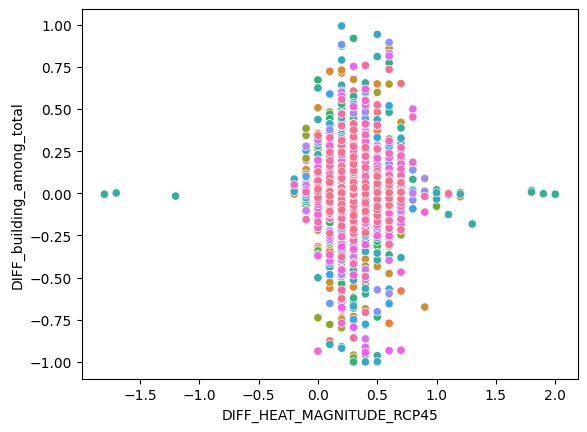

In [33]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from matplotlib import pyplot as plt
import seaborn as sns



sns.scatterplot(x=df_panel['DIFF_HEAT_MAGNITUDE_RCP45'],  
                y=df_panel['DIFF_building_among_total'],
                hue=df_panel['BQ_COMPANY_NAME'],
                legend=False).set(title=                
                '')
 
plt.show()

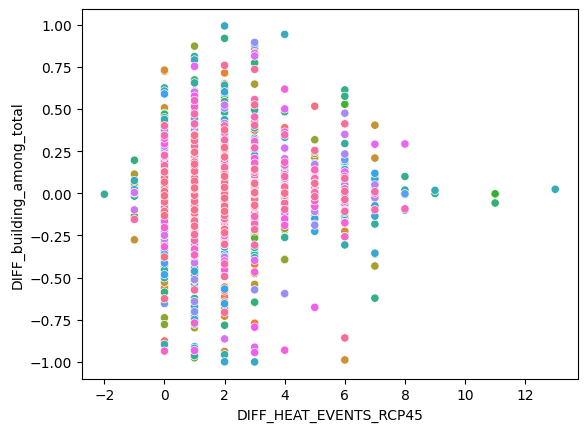

In [34]:
sns.scatterplot(x=df_panel['DIFF_HEAT_EVENTS_RCP45'],  
                y=df_panel['DIFF_building_among_total'],
                hue=df_panel['BQ_COMPANY_NAME'],
                legend=False).set(title=                
                '')
 
plt.show()

In [35]:
y_var_name = 'DIFF_building_among_total'
X_var_names = ['DIFF_HEAT_EVENTS_RCP45','DIFF_HEAT_MAGNITUDE_RCP45']
pooled_y=df_panel[y_var_name]
pooled_X=df_panel[X_var_names]
pooled_X = sm.add_constant(pooled_X)
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X)
pooled_olsr_model_results = pooled_olsr_model.fit()
print(pooled_olsr_model_results.summary())

                                OLS Regression Results                               
Dep. Variable:     DIFF_building_among_total   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.001
Method:                        Least Squares   F-statistic:                     6.729
Date:                       Mon, 21 Apr 2025   Prob (F-statistic):            0.00120
Time:                               11:56:34   Log-Likelihood:                 5065.4
No. Observations:                       8364   AIC:                        -1.012e+04
Df Residuals:                           8361   BIC:                        -1.010e+04
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

Moyenne empirique des résidus estimés : 1.0064216849244305e-16


<Axes: ylabel='Frequency'>

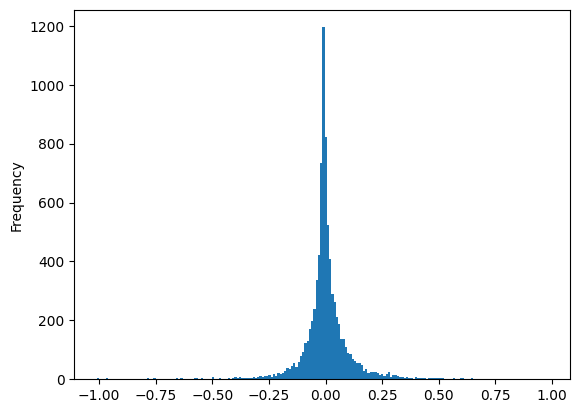

In [36]:
print(f"Moyenne empirique des résidus estimés : {pooled_olsr_model_results.resid.mean()}")
pooled_olsr_model_results.resid.plot.hist(bins=200)

$\text{On trouve des résidus qui semble suivre une loi normale et de moyenne nulle.}$\
$\hat{\mathbb{E}}(\Delta \epsilon_{it}) = 0$

In [37]:
from statsmodels.tsa.stattools import adfuller

for name, group in df_panel.groupby('BQ_COMPANY_NAME'):
    series = group.sort_values('BQ_YEAR')['DIFF_building_among_total'].dropna()
    if len(series) > 3:  # pour éviter les séries trop courtes
        result = adfuller(series)
        print(f"{name}: p-value = {result[1]}")


INDEPENDENT BANK CORP: p-value = 6.897096795528947e-14


#### Proposition de modélisation #2
- $Y_{it} = \text{'building\_among\_total' of firm i at date t} $

- $X_{it} = \begin{pmatrix} \text{heat magnitude firm i (so zip i) at date t} \\ \text{HEAT\_WETBULB\_MAGNITUDE firm i (so zip i) at date t} \\ \text{PRECIP\_ANNUALS firm i (so zip i) at date t} \\ \text{FIRE\_MAGNITUDE firm i (so zip i) at date t} \\  \end{pmatrix}$

- $t \in \left\{ 2010,2015,2020, 2023 \right\}$

- $i \in \text{les entreprises dont les valeurs financières sont disponibles en 2010,2015,2020 et 2023}$

$$ Y_{it} = X_{it}^{'}\beta_{0} + \alpha_{i} + \epsilon_{it}$$

Hypothèse : Stricte exogéneité, iid along the firm, $\mathbb{E}[\alpha_{i}] = 0$, $\mathbb{E}[\epsilon_{it}] = 0$

Procédure : $ \text{First Difference :}$ $$ \Delta Y_{it} = \Delta X_{it}^{'}\beta_{0} + \Delta\epsilon_{it}$$


In [38]:
features_mod2 = [
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',


 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',

'HEAT_WETBULB_MAGNITUDE_2010_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP45_F',

'HEAT_WETBULB_MAGNITUDE_2010_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP85_F',

'PRECIP_ANNUAL_2010_RCP45_IN',
 'PRECIP_ANNUAL_2015_RCP45_IN',
 'PRECIP_ANNUAL_2020_RCP45_IN',
 'PRECIP_ANNUAL_2025_RCP45_IN',

'PRECIP_ANNUAL_2010_RCP85_IN',
 'PRECIP_ANNUAL_2015_RCP85_IN',
 'PRECIP_ANNUAL_2020_RCP85_IN',
 'PRECIP_ANNUAL_2025_RCP85_IN',

# 'DROUGHT_MAGNITUDE_2010',
#  'DROUGHT_MAGNITUDE_2015',
#  'DROUGHT_MAGNITUDE_2020',
#  'DROUGHT_MAGNITUDE_2025_RCP85',

 'FIRE_MAGNITUDE_2010_RCP45_FWI',
 'FIRE_MAGNITUDE_2015_RCP45_FWI',
 'FIRE_MAGNITUDE_2020_RCP45_FWI',
 'FIRE_MAGNITUDE_2025_RCP45_FWI',

  'FIRE_MAGNITUDE_2010_RCP85_FWI',
 'FIRE_MAGNITUDE_2015_RCP85_FWI',
 'FIRE_MAGNITUDE_2020_RCP85_FWI',
 'FIRE_MAGNITUDE_2025_RCP85_FWI',
 ]

In [39]:
df_panel = financ_with_clim.loc[financ_with_clim["BQ_YEAR"].isin([2010, 2015, 2020, 2023])][["BQ_COMPANY_NAME","BQ_YEAR","building_among_total"] + features_mod2]
df_panel = remplacer_2025_par_2023(df_panel)
df_panel

,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_2010_RCP45_F,HEAT_MAGNITUDE_2015_RCP45_F,HEAT_MAGNITUDE_2020_RCP45_F,HEAT_MAGNITUDE_2023_RCP45_F,HEAT_MAGNITUDE_2010_RCP85_F,HEAT_MAGNITUDE_2015_RCP85_F,HEAT_MAGNITUDE_2020_RCP85_F,...,PRECIP_ANNUAL_2020_RCP85_IN,PRECIP_ANNUAL_2023_RCP85_IN,FIRE_MAGNITUDE_2010_RCP45_FWI,FIRE_MAGNITUDE_2015_RCP45_FWI,FIRE_MAGNITUDE_2020_RCP45_FWI,FIRE_MAGNITUDE_2023_RCP45_FWI,FIRE_MAGNITUDE_2010_RCP85_FWI,FIRE_MAGNITUDE_2015_RCP85_FWI,FIRE_MAGNITUDE_2020_RCP85_FWI,FIRE_MAGNITUDE_2023_RCP85_FWI
2,VIASAT INC,2015,0.577775,91.6,92.0,92.1,92.2,91.4,91.9,92.3,...,12.4,12.4,58.7,59.5,59.5,59.7,58.5,59.1,59.5,59.5
5,VIASAT INC,2010,0.165847,91.6,92.0,92.1,92.2,91.4,91.9,92.3,...,12.4,12.4,58.7,59.5,59.5,59.7,58.5,59.1,59.5,59.5
6,VIATRIS INC,2023,0.063021,91.4,92.0,92.3,92.7,91.7,92.1,92.4,...,40.0,40.2,20.7,20.7,20.4,21.1,20.6,21.0,21.6,21.3
9,VIATRIS INC,2020,0.061467,91.4,92.0,92.3,92.7,91.7,92.1,92.4,...,40.0,40.2,20.7,20.7,20.4,21.1,20.6,21.0,21.6,21.3
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,93.5,94.1,94.4,94.7,93.7,94.3,94.6,...,48.0,48.9,23.0,23.3,22.9,23.3,23.1,23.8,23.6,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,88.8,89.3,89.4,89.4,88.6,89.1,89.5,...,12.7,12.7,53.1,53.1,53.1,53.1,53.0,53.2,53.1,53.1
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,88.8,89.3,89.4,89.4,88.6,89.1,89.5,...,12.7,12.7,53.1,53.1,53.1,53.1,53.0,53.2,53.1,53.1
44939,VOYA FINANCIAL INC,2023,0.000000,96.2,96.5,96.7,96.9,96.0,96.3,96.7,...,54.2,54.0,24.0,23.2,23.0,23.0,23.0,24.0,24.0,24.0
44940,VIASAT INC,2023,0.486870,91.6,92.0,92.1,92.2,91.4,91.9,92.3,...,12.4,12.4,58.7,59.5,59.5,59.7,58.5,59.1,59.5,59.5


In [40]:
# Aligner les varaibles climatiques à la bonne date
df = df_panel
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_MAGNITUDE_{row["BQ_YEAR"]}_{scenario}_F'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_MAGNITUDE_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_MAGNITUDE_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_MAGNITUDE_" in col and col not in ['HEAT_MAGNITUDE_RCP45', 'HEAT_MAGNITUDE_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_wet_magnitude(row, scenario):
    col_name = f'HEAT_WETBULB_MAGNITUDE_{row["BQ_YEAR"]}_{scenario}_F'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_WETBULB_MAGNITUDE_RCP45'] = df.apply(lambda row: get_wet_magnitude(row, 'RCP45'), axis=1)
df['HEAT_WETBULB_MAGNITUDE_RCP85'] = df.apply(lambda row: get_wet_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_WETBULB_MAGNITUDE_" in col and col not in ['HEAT_WETBULB_MAGNITUDE_RCP45', 'HEAT_WETBULB_MAGNITUDE_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_precip_magnitude(row, scenario):
    col_name = f'PRECIP_ANNUAL_{row["BQ_YEAR"]}_{scenario}_IN'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['PRECIP_ANNUAL_RCP45'] = df.apply(lambda row: get_precip_magnitude(row, 'RCP45'), axis=1)
df['PRECIP_ANNUAL_RCP85'] = df.apply(lambda row: get_precip_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "PRECIP_ANNUAL_" in col and col not in ['PRECIP_ANNUAL_RCP45', 'PRECIP_ANNUAL_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_fire_magnitude(row, scenario):
    col_name = f'FIRE_MAGNITUDE_{row["BQ_YEAR"]}_{scenario}_FWI'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['FIRE_MAGNITUDE_RCP45'] = df.apply(lambda row: get_fire_magnitude(row, 'RCP45'), axis=1)
df['FIRE_MAGNITUDE_RCP85'] = df.apply(lambda row: get_fire_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "FIRE_MAGNITUDE_" in col and col not in ['FIRE_MAGNITUDE_RCP45', 'FIRE_MAGNITUDE_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [41]:
df

,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_RCP45,HEAT_MAGNITUDE_RCP85,HEAT_WETBULB_MAGNITUDE_RCP45,HEAT_WETBULB_MAGNITUDE_RCP85,PRECIP_ANNUAL_RCP45,PRECIP_ANNUAL_RCP85,FIRE_MAGNITUDE_RCP45,FIRE_MAGNITUDE_RCP85
2,VIASAT INC,2015,0.577775,92.0,91.9,63.3,63.3,11.8,12.0,59.5,59.1
5,VIASAT INC,2010,0.165847,91.6,91.4,63.2,63.1,11.9,11.7,58.7,58.5
6,VIATRIS INC,2023,0.063021,92.7,92.9,74.7,74.9,39.4,40.2,21.1,21.3
9,VIATRIS INC,2020,0.061467,92.3,92.4,74.4,74.5,39.6,40.0,20.4,21.6
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,94.7,95.0,76.0,76.3,48.1,48.9,23.3,23.3
...,...,...,...,...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,89.4,89.9,63.3,63.5,12.1,12.7,53.1,53.1
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,89.4,89.5,63.0,63.1,12.0,12.7,53.1,53.1
44939,VOYA FINANCIAL INC,2023,0.000000,96.9,97.2,78.2,78.5,53.7,54.0,23.0,24.0
44940,VIASAT INC,2023,0.486870,92.2,92.7,63.8,64.0,11.9,12.4,59.7,59.5


In [42]:
df.columns

Index(['BQ_COMPANY_NAME', 'BQ_YEAR', 'building_among_total',
       'HEAT_MAGNITUDE_RCP45', 'HEAT_MAGNITUDE_RCP85',
       'HEAT_WETBULB_MAGNITUDE_RCP45', 'HEAT_WETBULB_MAGNITUDE_RCP85',
       'PRECIP_ANNUAL_RCP45', 'PRECIP_ANNUAL_RCP85', 'FIRE_MAGNITUDE_RCP45',
       'FIRE_MAGNITUDE_RCP85'],
      dtype='object')

In [43]:
df = df_panel.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = list(df.columns)
variables.remove('BQ_COMPANY_NAME')
variables.remove('BQ_YEAR')


# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()

df_panel = df.dropna(subset='DIFF_HEAT_MAGNITUDE_RCP45').drop(columns=variables)
del df
df_panel

,BQ_COMPANY_NAME,BQ_YEAR,DIFF_building_among_total,DIFF_HEAT_MAGNITUDE_RCP45,DIFF_HEAT_MAGNITUDE_RCP85,DIFF_HEAT_WETBULB_MAGNITUDE_RCP45,DIFF_HEAT_WETBULB_MAGNITUDE_RCP85,DIFF_PRECIP_ANNUAL_RCP45,DIFF_PRECIP_ANNUAL_RCP85,DIFF_FIRE_MAGNITUDE_RCP45,DIFF_FIRE_MAGNITUDE_RCP85
2532,1 800 FLOWERS COM INC,2015,0.148081,0.7,0.5,0.4,0.3,1.2,0.1,0.4,0.0
2527,1 800 FLOWERS COM INC,2020,-0.060676,0.0,0.2,0.1,0.3,0.3,-0.4,-1.0,0.0
2540,10X GENOMICS INC,2023,0.228456,0.5,0.2,0.4,0.5,-0.2,0.1,0.3,0.0
2545,"111, INC",2023,-0.002217,0.2,0.4,0.2,0.3,-0.1,0.8,0.3,-0.7
15547,12 RETECH CORP,2020,0.481514,0.5,0.4,0.3,0.5,-0.1,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1504,ZW DATA ACTION TECHNOLOGIES INC,2020,-0.013979,0.1,0.2,0.1,0.3,0.2,-0.2,-0.8,-1.0
13316,ZYNERBA PHARMACEUTICALS INC,2020,-0.624958,0.2,0.2,0.2,0.3,-0.1,-0.1,-0.8,-0.2
1488,ZYNEX INC.,2015,0.031637,0.3,0.2,0.2,0.2,-0.1,-0.1,0.3,0.5
1483,ZYNEX INC.,2020,-0.107015,0.4,0.5,0.4,0.3,0.1,0.1,0.2,0.5


In [158]:
y_var_name = 'DIFF_building_among_total'
scenario = 'RCP85'
X_var_names = [col for col in list(df_panel.columns) if col.startswith('DIFF') and scenario in col]
#X_var_names.remove(y_var_name)
pooled_y=df_panel[y_var_name]
pooled_X=df_panel[X_var_names]
pooled_X = sm.add_constant(pooled_X)
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X)
pooled_olsr_model_results = pooled_olsr_model.fit()
print(pooled_olsr_model_results.summary())

                                OLS Regression Results                               
Dep. Variable:     DIFF_building_among_total   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     1.517
Date:                       Mon, 21 Apr 2025   Prob (F-statistic):              0.181
Time:                               18:16:09   Log-Likelihood:                 5062.4
No. Observations:                       8364   AIC:                        -1.011e+04
Df Residuals:                           8358   BIC:                        -1.007e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

$\text{Dans le scénario RCP45, on trouve un  seul coefficient signaficatif statistiquement  DIFF\_HEAT\_MAGNITUDE}$
$\text{et dans le scénario RCP85, on en trouve aucun.}$

Moyenne empirique des résidus estimés : 3.447213289038177e-17


<Axes: ylabel='Frequency'>

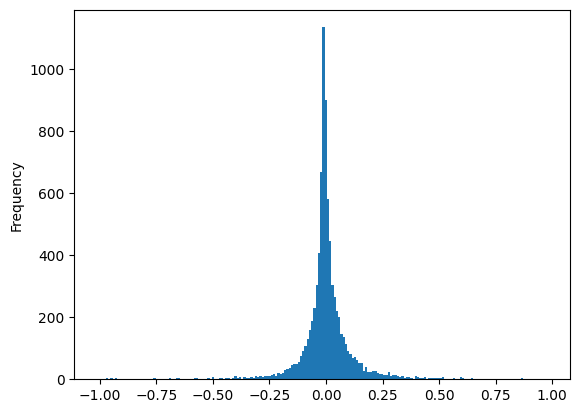

In [45]:
print(f"Moyenne empirique des résidus estimés : {pooled_olsr_model_results.resid.mean()}")
pooled_olsr_model_results.resid.plot.hist(bins=200)

$$\text{Il faudrait vérifier que les résidus sont non corrélés pour avoir une bonne idée si ce sont des bruits blancs}$$

#### Proposition de modélisation #3 : combinons fréquences et amplitudes
- $Y_{it} = \text{'building\_among\_total' of firm i at date t} $

- $X_{it} = \begin{pmatrix} \text{heat\_magnitude}\times \text{ HEAT\_EVENTS firm i (so zip i) at date t} \\ 
\text{HEAT\_WETBULB\_MAGNITUDE} \times \text{HEAT\_WETBULB\_EVENTS firm i (so zip i) at date t} \\ 
\text{PRECIP\_TOTALS} \times \text{PRECIP\_EVENTS firm i (so zip i) at date t} 
\\ \text{ PRECIP\_ANNUALS firm i (so zip i) at date t} 
\\ 
\\ \text{FIRE\_EVENTS} \times \text{FIRE\_MAGNITUDE firm i (so zip i) at date t} \end{pmatrix}$

- $t \in \left\{ 2010,2015,2020, 2023 \right\}$

- $i \in \text{les entreprises dont les valeurs financières sont disponibles en 2010,2015,2020 et 2023}$

$$ Y_{it} = X_{it}^{'}\beta_{0} + \alpha_{i} + \epsilon_{it}$$

Hypothèse : Stricte exogéneité, iid along the firm, $\mathbb{E}[\alpha_{i}] = 0$, $\mathbb{E}[\epsilon_{it}] = 0$

Procédure : $ \text{First Difference :}$ $$ \Delta Y_{it} = \Delta X_{it}^{'}\beta_{0} + \Delta\epsilon_{it}$$



verif $\text{FLOOD\_TIDAL\_EVENTS\_****\_P75 firm i (so zip i) at date t}$ parce qu'il manque des années

In [130]:
features_mod3 = [
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',

 'HEAT_EVENTS_2010_RCP45',
 'HEAT_EVENTS_2015_RCP45',
 'HEAT_EVENTS_2020_RCP45',
 'HEAT_EVENTS_2025_RCP45',


 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',

 'HEAT_EVENTS_2010_RCP85',
 'HEAT_EVENTS_2015_RCP85',
 'HEAT_EVENTS_2020_RCP85',
 'HEAT_EVENTS_2025_RCP85',

'HEAT_WETBULB_MAGNITUDE_2010_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP45_F',

'HEAT_WETBULB_EVENTS_2010_RCP45',
 'HEAT_WETBULB_EVENTS_2015_RCP45',
 'HEAT_WETBULB_EVENTS_2020_RCP45',
 'HEAT_WETBULB_EVENTS_2025_RCP45',

'HEAT_WETBULB_MAGNITUDE_2010_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP85_F',

 'HEAT_WETBULB_EVENTS_2010_RCP85',
 'HEAT_WETBULB_EVENTS_2015_RCP85',
 'HEAT_WETBULB_EVENTS_2020_RCP85',
 'HEAT_WETBULB_EVENTS_2025_RCP85',
 
'PRECIP_TOTALS_2010_RCP45_IN',
 'PRECIP_TOTALS_2015_RCP45_IN',
 'PRECIP_TOTALS_2020_RCP45_IN',
 'PRECIP_TOTALS_2025_RCP45_IN',

'PRECIP_TOTALS_2010_RCP85_IN',
 'PRECIP_TOTALS_2015_RCP85_IN',
 'PRECIP_TOTALS_2020_RCP85_IN',
 'PRECIP_TOTALS_2025_RCP85_IN',

 'PRECIP_EVENTS_2010_RCP45',
 'PRECIP_EVENTS_2015_RCP45',
 'PRECIP_EVENTS_2020_RCP45',
 'PRECIP_EVENTS_2025_RCP45',

 'PRECIP_EVENTS_2010_RCP85',
 'PRECIP_EVENTS_2015_RCP85',
 'PRECIP_EVENTS_2020_RCP85',
 'PRECIP_EVENTS_2025_RCP85',

  'PRECIP_ANNUAL_2010_RCP45_IN',
 'PRECIP_ANNUAL_2015_RCP45_IN',
 'PRECIP_ANNUAL_2020_RCP45_IN',
 'PRECIP_ANNUAL_2025_RCP45_IN',

 'PRECIP_ANNUAL_2010_RCP85_IN',
 'PRECIP_ANNUAL_2015_RCP85_IN',
 'PRECIP_ANNUAL_2020_RCP85_IN',
 'PRECIP_ANNUAL_2025_RCP85_IN',

 'FIRE_MAGNITUDE_2010_RCP45_FWI',
 'FIRE_MAGNITUDE_2015_RCP45_FWI',
 'FIRE_MAGNITUDE_2020_RCP45_FWI',
 'FIRE_MAGNITUDE_2025_RCP45_FWI',

  'FIRE_MAGNITUDE_2010_RCP85_FWI',
 'FIRE_MAGNITUDE_2015_RCP85_FWI',
 'FIRE_MAGNITUDE_2020_RCP85_FWI',
 'FIRE_MAGNITUDE_2025_RCP85_FWI',

 'FIRE_EVENTS_2010_RCP85',
 'FIRE_EVENTS_2015_RCP85',
 'FIRE_EVENTS_2020_RCP85',
 'FIRE_EVENTS_2025_RCP85',

  'FIRE_EVENTS_2010_RCP45',
 'FIRE_EVENTS_2015_RCP45',
 'FIRE_EVENTS_2020_RCP45',
 'FIRE_EVENTS_2025_RCP45',
 ]

In [148]:
df_panel = financ_with_clim.loc[financ_with_clim["BQ_YEAR"].isin([2010, 2015, 2020, 2023])][["BQ_COMPANY_NAME","BQ_YEAR","building_among_total"] + features_mod3]
df_panel = remplacer_2025_par_2023(df_panel)

for year in [2010, 2015, 2020, 2023]:
    df_panel[f"HEAT_STRESS_INDEX_{year}_RCP45"] = df_panel[f"HEAT_MAGNITUDE_{year}_RCP45_F"] * df_panel[f"HEAT_EVENTS_{year}_RCP45"]
    df_panel[f"HEAT_STRESS_INDEX_{year}_RCP85"] = df_panel[f"HEAT_MAGNITUDE_{year}_RCP85_F"] * df_panel[f"HEAT_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"HEAT_MAGNITUDE_{year}_RCP45_F",f"HEAT_EVENTS_{year}_RCP45",f"HEAT_MAGNITUDE_{year}_RCP85_F", f"HEAT_EVENTS_{year}_RCP85"])

    df_panel[f"HEAT_WETBULB_STRESS_INDEX_{year}_RCP45"] = df_panel[f"HEAT_WETBULB_MAGNITUDE_{year}_RCP45_F"] * df_panel[f"HEAT_WETBULB_EVENTS_{year}_RCP45"]
    df_panel[f"HEAT_WETBULB_STRESS_INDEX_{year}_RCP85"] = df_panel[f"HEAT_WETBULB_MAGNITUDE_{year}_RCP85_F"] * df_panel[f"HEAT_WETBULB_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"HEAT_WETBULB_MAGNITUDE_{year}_RCP45_F",f"HEAT_WETBULB_MAGNITUDE_{year}_RCP85_F",f"HEAT_WETBULB_EVENTS_{year}_RCP45", f"HEAT_WETBULB_EVENTS_{year}_RCP85"])

    df_panel[f"PRECIP_STRESS_INDEX_{year}_RCP45"] = df_panel[f"PRECIP_TOTALS_{year}_RCP45_IN"] * df_panel[f"PRECIP_EVENTS_{year}_RCP45"]
    df_panel[f"PRECIP_STRESS_INDEX_{year}_RCP85"] = df_panel[f"PRECIP_TOTALS_{year}_RCP85_IN"] * df_panel[f"PRECIP_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"PRECIP_TOTALS_{year}_RCP45_IN",f"PRECIP_TOTALS_{year}_RCP85_IN",f"PRECIP_EVENTS_{year}_RCP45", f"PRECIP_EVENTS_{year}_RCP85"])

    df_panel[f"FIRE_STRESS_INDEX_{year}_RCP45"] = df_panel[f"FIRE_MAGNITUDE_{year}_RCP45_FWI"] * df_panel[f"FIRE_EVENTS_{year}_RCP45"]
    df_panel[f"FIRE_STRESS_INDEX_{year}_RCP85"] = df_panel[f"FIRE_MAGNITUDE_{year}_RCP85_FWI"] * df_panel[f"FIRE_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"FIRE_MAGNITUDE_{year}_RCP45_FWI",f"FIRE_MAGNITUDE_{year}_RCP85_FWI",f"FIRE_EVENTS_{year}_RCP45", f"FIRE_EVENTS_{year}_RCP85"])
    


df_panel

,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,PRECIP_ANNUAL_2010_RCP45_IN,PRECIP_ANNUAL_2015_RCP45_IN,PRECIP_ANNUAL_2020_RCP45_IN,PRECIP_ANNUAL_2023_RCP45_IN,PRECIP_ANNUAL_2010_RCP85_IN,PRECIP_ANNUAL_2015_RCP85_IN,PRECIP_ANNUAL_2020_RCP85_IN,...,FIRE_STRESS_INDEX_2020_RCP45,FIRE_STRESS_INDEX_2020_RCP85,HEAT_STRESS_INDEX_2023_RCP45,HEAT_STRESS_INDEX_2023_RCP85,HEAT_WETBULB_STRESS_INDEX_2023_RCP45,HEAT_WETBULB_STRESS_INDEX_2023_RCP85,PRECIP_STRESS_INDEX_2023_RCP45,PRECIP_STRESS_INDEX_2023_RCP85,FIRE_STRESS_INDEX_2023_RCP45,FIRE_STRESS_INDEX_2023_RCP85
2,VIASAT INC,2015,0.577775,11.9,11.8,11.8,11.9,11.7,12.0,12.4,...,535.5,535.5,1198.6,1297.8,893.2,1024.0,79.0,85.0,537.3,535.5
5,VIASAT INC,2010,0.165847,11.9,11.8,11.8,11.9,11.7,12.0,12.4,...,535.5,535.5,1198.6,1297.8,893.2,1024.0,79.0,85.0,537.3,535.5
6,VIATRIS INC,2023,0.063021,39.1,39.5,39.6,39.4,39.4,39.8,40.0,...,102.0,129.6,1854.0,2043.8,1494.0,1647.8,219.8,233.8,126.6,127.8
9,VIATRIS INC,2020,0.061467,39.1,39.5,39.6,39.4,39.4,39.8,40.0,...,102.0,129.6,1854.0,2043.8,1494.0,1647.8,219.8,233.8,126.6,127.8
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,47.6,48.5,48.4,48.1,47.9,47.9,48.0,...,137.4,165.2,1704.6,1805.0,1368.0,1526.0,266.5,274.3,139.8,139.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,12.1,12.1,12.0,12.1,11.8,12.3,12.7,...,477.9,477.9,1162.2,1258.6,949.5,1079.5,74.7,90.0,477.9,477.9
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,12.1,12.1,12.0,12.1,11.8,12.3,12.7,...,477.9,477.9,1162.2,1258.6,949.5,1079.5,74.7,90.0,477.9,477.9
44939,VOYA FINANCIAL INC,2023,0.000000,53.9,54.5,54.2,53.7,53.7,53.8,54.2,...,115.0,144.0,1938.0,1944.0,1798.6,2041.0,284.7,284.7,138.0,144.0
44940,VIASAT INC,2023,0.486870,11.9,11.8,11.8,11.9,11.7,12.0,12.4,...,535.5,535.5,1198.6,1297.8,893.2,1024.0,79.0,85.0,537.3,535.5


In [150]:
# Aligner les varaibles climatiques à la bonne date
df = df_panel
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_STRESS_INDEX_" in col and col not in ['HEAT_STRESS_INDEX_RCP45', 'HEAT_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_wet_magnitude(row, scenario):
    col_name = f'HEAT_WETBULB_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_WETBULB_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_wet_magnitude(row, 'RCP45'), axis=1)
df['HEAT_WETBULB_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_wet_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_WETBULB_STRESS_INDEX_" in col and col not in ['HEAT_WETBULB_STRESS_INDEX_RCP45', 'HEAT_WETBULB_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_precip_magnitude(row, scenario):
    col_name = f'PRECIP_ANNUAL_{row["BQ_YEAR"]}_{scenario}_IN'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['PRECIP_ANNUAL_RCP45'] = df.apply(lambda row: get_precip_magnitude(row, 'RCP45'), axis=1)
df['PRECIP_ANNUAL_RCP85'] = df.apply(lambda row: get_precip_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "PRECIP_ANNUAL_" in col and col not in ['PRECIP_ANNUAL_RCP45', 'PRECIP_ANNUAL_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_precip1_magnitude(row, scenario):
    col_name = f'PRECIP_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['PRECIP_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_precip1_magnitude(row, 'RCP45'), axis=1)
df['PRECIP_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_precip1_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "PRECIP_STRESS_INDEX_" in col and col not in ['PRECIP_STRESS_INDEX_RCP45', 'PRECIP_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_fire_magnitude(row, scenario):
    col_name = f'FIRE_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['FIRE_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_fire_magnitude(row, 'RCP45'), axis=1)
df['FIRE_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_fire_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "FIRE_STRESS_INDEX_" in col and col not in ['FIRE_STRESS_INDEX_RCP45', 'FIRE_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [151]:
df

,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_STRESS_INDEX_RCP45,HEAT_STRESS_INDEX_RCP85,HEAT_WETBULB_STRESS_INDEX_RCP45,HEAT_WETBULB_STRESS_INDEX_RCP85,PRECIP_ANNUAL_RCP45,PRECIP_ANNUAL_RCP85,PRECIP_STRESS_INDEX_RCP45,PRECIP_STRESS_INDEX_RCP85,FIRE_STRESS_INDEX_RCP45,FIRE_STRESS_INDEX_RCP85
2,VIASAT INC,2015,0.577775,1104.0,1010.9,696.3,696.3,11.8,12.0,71.1,80.0,535.5,531.9
5,VIASAT INC,2010,0.165847,1007.6,914.0,632.0,631.0,11.9,11.7,71.1,69.3,469.6,468.0
6,VIATRIS INC,2023,0.063021,1854.0,2043.8,1494.0,1647.8,39.4,40.2,219.8,233.8,126.6,127.8
9,VIATRIS INC,2020,0.061467,1661.4,1755.6,1264.8,1415.5,39.6,40.0,221.2,229.6,102.0,129.6
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,1704.6,1805.0,1368.0,1526.0,48.1,48.9,266.5,274.3,139.8,139.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,1162.2,1258.6,949.5,1079.5,12.1,12.7,74.7,90.0,477.9,477.9
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,1162.2,1163.5,756.0,883.4,12.0,12.7,73.8,89.0,477.9,477.9
44939,VOYA FINANCIAL INC,2023,0.000000,1938.0,1944.0,1798.6,2041.0,53.7,54.0,284.7,284.7,138.0,144.0
44940,VIASAT INC,2023,0.486870,1198.6,1297.8,893.2,1024.0,11.9,12.4,79.0,85.0,537.3,535.5


In [154]:
df = df_panel.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = list(df.columns)
variables.remove('BQ_COMPANY_NAME')
variables.remove('BQ_YEAR')


# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()

df_panel = df.dropna(subset='DIFF_building_among_total').drop(columns=variables)
del df
df_panel

,BQ_COMPANY_NAME,BQ_YEAR,DIFF_building_among_total,DIFF_HEAT_STRESS_INDEX_RCP45,DIFF_HEAT_STRESS_INDEX_RCP85,DIFF_HEAT_WETBULB_STRESS_INDEX_RCP45,DIFF_HEAT_WETBULB_STRESS_INDEX_RCP85,DIFF_PRECIP_ANNUAL_RCP45,DIFF_PRECIP_ANNUAL_RCP85,DIFF_PRECIP_STRESS_INDEX_RCP45,DIFF_PRECIP_STRESS_INDEX_RCP85,DIFF_FIRE_STRESS_INDEX_RCP45,DIFF_FIRE_STRESS_INDEX_RCP85
2532,1 800 FLOWERS COM INC,2015,0.148081,192.2,97.8,155.6,154.4,1.2,0.1,31.5,3.6,-23.2,26.0
2527,1 800 FLOWERS COM INC,2020,-0.060676,0.0,186.6,1.4,155.6,0.3,-0.4,1.2,-6.0,-6.0,0.0
2540,10X GENOMICS INC,2023,0.228456,206.5,203.2,138.8,207.3,-0.2,0.1,-2.2,1.2,3.0,0.0
2545,"111, INC",2023,-0.002217,100.5,298.2,234.4,237.6,-0.1,0.8,0.0,27.2,1.8,-4.2
15547,12 RETECH CORP,2020,0.481514,232.8,231.2,81.3,162.1,-0.1,0.2,0.0,7.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,ZW DATA ACTION TECHNOLOGIES INC,2020,-0.013979,1.5,97.5,79.0,160.3,0.2,-0.2,-2.2,-3.3,-29.0,-32.0
13316,ZYNERBA PHARMACEUTICALS INC,2020,-0.624958,3.4,97.8,78.5,231.6,-0.1,-0.1,-22.7,0.0,-4.8,-1.4
1488,ZYNEX INC.,2015,0.031637,100.6,99.2,145.4,145.6,-0.1,-0.1,-1.1,-2.2,42.0,43.1
1483,ZYNEX INC.,2020,-0.107015,199.4,298.1,221.3,219.9,0.1,0.1,2.2,1.1,1.6,4.0


In [160]:
y_var_name = 'DIFF_building_among_total'
scenario = 'RCP45'
X_var_names = [col for col in list(df_panel.columns) if col.startswith('DIFF') and scenario in col]
#X_var_names.remove(y_var_name)
pooled_y=df_panel[y_var_name]
pooled_X=df_panel[X_var_names]
pooled_X = sm.add_constant(pooled_X)
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X)
pooled_olsr_model_results = pooled_olsr_model.fit()
print(pooled_olsr_model_results.summary())

                                OLS Regression Results                               
Dep. Variable:     DIFF_building_among_total   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                  0.001
Method:                        Least Squares   F-statistic:                     2.400
Date:                       Mon, 21 Apr 2025   Prob (F-statistic):             0.0349
Time:                               18:19:12   Log-Likelihood:                 5064.7
No. Observations:                       8364   AIC:                        -1.012e+04
Df Residuals:                           8358   BIC:                        -1.008e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

$\text{On trouve aucune corrélation entre nos nouvelles features STRESS\_INDEX et DIFF\_building\_among\_total  }$
$\text{que ce soit dans le scénario RCP45 ou RCP85 }$

## QUENTIN : Test d'exogonéité forte à faire ici

#### Proposition de modélisation #4 : Exogéneité faible
- $Y_{it} = \text{'building\_among\_total' of firm i at date t} $

- $X_{it} = \begin{pmatrix} \text{heat\_magnitude}\times \text{ HEAT\_EVENTS firm i (so zip i) at date t} \\ 
\text{HEAT\_WETBULB\_MAGNITUDE} \times \text{HEAT\_WETBULB\_EVENTS firm i (so zip i) at date t} \\ 
\text{PRECIP\_TOTALS} \times \text{PRECIP\_EVENTS firm i (so zip i) at date t} 
\\ \text{ PRECIP\_ANNUALS firm i (so zip i) at date t} 
\\ 
\\ \text{FIRE\_EVENTS} \times \text{FIRE\_MAGNITUDE firm i (so zip i) at date t} \end{pmatrix}$

- $t \in \left\{ 2010,2015,2020, 2023 \right\}$

- $i \in \text{les entreprises dont les valeurs financières sont disponibles en 2010,2015,2020 et 2023}$

$$ Y_{it} = X_{it}^{'}\beta_{0} + \alpha_{i} + \epsilon_{it}$$

Hypothèse : Faible exogéneité, iid along the firm, $\mathbb{E}[\alpha_{i}] = 0$, $\mathbb{E}[\epsilon_{it}] = 0$

Procédure : $ \text{2SLS with IV : }$ $X_{t-1}$ 



In [176]:
features_mod4 = [
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',

 'HEAT_EVENTS_2010_RCP45',
 'HEAT_EVENTS_2015_RCP45',
 'HEAT_EVENTS_2020_RCP45',
 'HEAT_EVENTS_2025_RCP45',


 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',

 'HEAT_EVENTS_2010_RCP85',
 'HEAT_EVENTS_2015_RCP85',
 'HEAT_EVENTS_2020_RCP85',
 'HEAT_EVENTS_2025_RCP85',

'HEAT_WETBULB_MAGNITUDE_2010_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP45_F',

'HEAT_WETBULB_EVENTS_2010_RCP45',
 'HEAT_WETBULB_EVENTS_2015_RCP45',
 'HEAT_WETBULB_EVENTS_2020_RCP45',
 'HEAT_WETBULB_EVENTS_2025_RCP45',

'HEAT_WETBULB_MAGNITUDE_2010_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP85_F',

 'HEAT_WETBULB_EVENTS_2010_RCP85',
 'HEAT_WETBULB_EVENTS_2015_RCP85',
 'HEAT_WETBULB_EVENTS_2020_RCP85',
 'HEAT_WETBULB_EVENTS_2025_RCP85',
 
'PRECIP_TOTALS_2010_RCP45_IN',
 'PRECIP_TOTALS_2015_RCP45_IN',
 'PRECIP_TOTALS_2020_RCP45_IN',
 'PRECIP_TOTALS_2025_RCP45_IN',

'PRECIP_TOTALS_2010_RCP85_IN',
 'PRECIP_TOTALS_2015_RCP85_IN',
 'PRECIP_TOTALS_2020_RCP85_IN',
 'PRECIP_TOTALS_2025_RCP85_IN',

 'PRECIP_EVENTS_2010_RCP45',
 'PRECIP_EVENTS_2015_RCP45',
 'PRECIP_EVENTS_2020_RCP45',
 'PRECIP_EVENTS_2025_RCP45',

 'PRECIP_EVENTS_2010_RCP85',
 'PRECIP_EVENTS_2015_RCP85',
 'PRECIP_EVENTS_2020_RCP85',
 'PRECIP_EVENTS_2025_RCP85',

  'PRECIP_ANNUAL_2010_RCP45_IN',
 'PRECIP_ANNUAL_2015_RCP45_IN',
 'PRECIP_ANNUAL_2020_RCP45_IN',
 'PRECIP_ANNUAL_2025_RCP45_IN',

 'PRECIP_ANNUAL_2010_RCP85_IN',
 'PRECIP_ANNUAL_2015_RCP85_IN',
 'PRECIP_ANNUAL_2020_RCP85_IN',
 'PRECIP_ANNUAL_2025_RCP85_IN',

 'FIRE_MAGNITUDE_2010_RCP45_FWI',
 'FIRE_MAGNITUDE_2015_RCP45_FWI',
 'FIRE_MAGNITUDE_2020_RCP45_FWI',
 'FIRE_MAGNITUDE_2025_RCP45_FWI',

  'FIRE_MAGNITUDE_2010_RCP85_FWI',
 'FIRE_MAGNITUDE_2015_RCP85_FWI',
 'FIRE_MAGNITUDE_2020_RCP85_FWI',
 'FIRE_MAGNITUDE_2025_RCP85_FWI',

 'FIRE_EVENTS_2010_RCP85',
 'FIRE_EVENTS_2015_RCP85',
 'FIRE_EVENTS_2020_RCP85',
 'FIRE_EVENTS_2025_RCP85',

  'FIRE_EVENTS_2010_RCP45',
 'FIRE_EVENTS_2015_RCP45',
 'FIRE_EVENTS_2020_RCP45',
 'FIRE_EVENTS_2025_RCP45',
 ]

In [177]:
df_panel = financ_with_clim.loc[financ_with_clim["BQ_YEAR"].isin([2010, 2015, 2020, 2023])][["BQ_COMPANY_NAME","BQ_YEAR","building_among_total"] + features_mod4]
df_panel = remplacer_2025_par_2023(df_panel)

for year in [2010, 2015, 2020, 2023]:
    df_panel[f"HEAT_STRESS_INDEX_{year}_RCP45"] = df_panel[f"HEAT_MAGNITUDE_{year}_RCP45_F"] * df_panel[f"HEAT_EVENTS_{year}_RCP45"]
    df_panel[f"HEAT_STRESS_INDEX_{year}_RCP85"] = df_panel[f"HEAT_MAGNITUDE_{year}_RCP85_F"] * df_panel[f"HEAT_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"HEAT_MAGNITUDE_{year}_RCP45_F",f"HEAT_EVENTS_{year}_RCP45",f"HEAT_MAGNITUDE_{year}_RCP85_F", f"HEAT_EVENTS_{year}_RCP85"])

    df_panel[f"HEAT_WETBULB_STRESS_INDEX_{year}_RCP45"] = df_panel[f"HEAT_WETBULB_MAGNITUDE_{year}_RCP45_F"] * df_panel[f"HEAT_WETBULB_EVENTS_{year}_RCP45"]
    df_panel[f"HEAT_WETBULB_STRESS_INDEX_{year}_RCP85"] = df_panel[f"HEAT_WETBULB_MAGNITUDE_{year}_RCP85_F"] * df_panel[f"HEAT_WETBULB_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"HEAT_WETBULB_MAGNITUDE_{year}_RCP45_F",f"HEAT_WETBULB_MAGNITUDE_{year}_RCP85_F",f"HEAT_WETBULB_EVENTS_{year}_RCP45", f"HEAT_WETBULB_EVENTS_{year}_RCP85"])

    df_panel[f"PRECIP_STRESS_INDEX_{year}_RCP45"] = df_panel[f"PRECIP_TOTALS_{year}_RCP45_IN"] * df_panel[f"PRECIP_EVENTS_{year}_RCP45"]
    df_panel[f"PRECIP_STRESS_INDEX_{year}_RCP85"] = df_panel[f"PRECIP_TOTALS_{year}_RCP85_IN"] * df_panel[f"PRECIP_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"PRECIP_TOTALS_{year}_RCP45_IN",f"PRECIP_TOTALS_{year}_RCP85_IN",f"PRECIP_EVENTS_{year}_RCP45", f"PRECIP_EVENTS_{year}_RCP85"])

    df_panel[f"FIRE_STRESS_INDEX_{year}_RCP45"] = df_panel[f"FIRE_MAGNITUDE_{year}_RCP45_FWI"] * df_panel[f"FIRE_EVENTS_{year}_RCP45"]
    df_panel[f"FIRE_STRESS_INDEX_{year}_RCP85"] = df_panel[f"FIRE_MAGNITUDE_{year}_RCP85_FWI"] * df_panel[f"FIRE_EVENTS_{year}_RCP85"]
    df_panel.drop(inplace = True, columns=[f"FIRE_MAGNITUDE_{year}_RCP45_FWI",f"FIRE_MAGNITUDE_{year}_RCP85_FWI",f"FIRE_EVENTS_{year}_RCP45", f"FIRE_EVENTS_{year}_RCP85"])
    


df_panel

,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,PRECIP_ANNUAL_2010_RCP45_IN,PRECIP_ANNUAL_2015_RCP45_IN,PRECIP_ANNUAL_2020_RCP45_IN,PRECIP_ANNUAL_2023_RCP45_IN,PRECIP_ANNUAL_2010_RCP85_IN,PRECIP_ANNUAL_2015_RCP85_IN,PRECIP_ANNUAL_2020_RCP85_IN,...,FIRE_STRESS_INDEX_2020_RCP45,FIRE_STRESS_INDEX_2020_RCP85,HEAT_STRESS_INDEX_2023_RCP45,HEAT_STRESS_INDEX_2023_RCP85,HEAT_WETBULB_STRESS_INDEX_2023_RCP45,HEAT_WETBULB_STRESS_INDEX_2023_RCP85,PRECIP_STRESS_INDEX_2023_RCP45,PRECIP_STRESS_INDEX_2023_RCP85,FIRE_STRESS_INDEX_2023_RCP45,FIRE_STRESS_INDEX_2023_RCP85
2,VIASAT INC,2015,0.577775,11.9,11.8,11.8,11.9,11.7,12.0,12.4,...,535.5,535.5,1198.6,1297.8,893.2,1024.0,79.0,85.0,537.3,535.5
5,VIASAT INC,2010,0.165847,11.9,11.8,11.8,11.9,11.7,12.0,12.4,...,535.5,535.5,1198.6,1297.8,893.2,1024.0,79.0,85.0,537.3,535.5
6,VIATRIS INC,2023,0.063021,39.1,39.5,39.6,39.4,39.4,39.8,40.0,...,102.0,129.6,1854.0,2043.8,1494.0,1647.8,219.8,233.8,126.6,127.8
9,VIATRIS INC,2020,0.061467,39.1,39.5,39.6,39.4,39.4,39.8,40.0,...,102.0,129.6,1854.0,2043.8,1494.0,1647.8,219.8,233.8,126.6,127.8
11,VERRICA PHARMACEUTICALS INC,2023,0.027084,47.6,48.5,48.4,48.1,47.9,47.9,48.0,...,137.4,165.2,1704.6,1805.0,1368.0,1526.0,266.5,274.3,139.8,139.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44935,VIANT TECHNOLOGY LLC.,2023,0.126586,12.1,12.1,12.0,12.1,11.8,12.3,12.7,...,477.9,477.9,1162.2,1258.6,949.5,1079.5,74.7,90.0,477.9,477.9
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,12.1,12.1,12.0,12.1,11.8,12.3,12.7,...,477.9,477.9,1162.2,1258.6,949.5,1079.5,74.7,90.0,477.9,477.9
44939,VOYA FINANCIAL INC,2023,0.000000,53.9,54.5,54.2,53.7,53.7,53.8,54.2,...,115.0,144.0,1938.0,1944.0,1798.6,2041.0,284.7,284.7,138.0,144.0
44940,VIASAT INC,2023,0.486870,11.9,11.8,11.8,11.9,11.7,12.0,12.4,...,535.5,535.5,1198.6,1297.8,893.2,1024.0,79.0,85.0,537.3,535.5


In [178]:
# Aligner les varaibles climatiques à la bonne date
df = df_panel
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_STRESS_INDEX_" in col and col not in ['HEAT_STRESS_INDEX_RCP45', 'HEAT_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_wet_magnitude(row, scenario):
    col_name = f'HEAT_WETBULB_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_WETBULB_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_wet_magnitude(row, 'RCP45'), axis=1)
df['HEAT_WETBULB_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_wet_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_WETBULB_STRESS_INDEX_" in col and col not in ['HEAT_WETBULB_STRESS_INDEX_RCP45', 'HEAT_WETBULB_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_precip_magnitude(row, scenario):
    col_name = f'PRECIP_ANNUAL_{row["BQ_YEAR"]}_{scenario}_IN'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['PRECIP_ANNUAL_RCP45'] = df.apply(lambda row: get_precip_magnitude(row, 'RCP45'), axis=1)
df['PRECIP_ANNUAL_RCP85'] = df.apply(lambda row: get_precip_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "PRECIP_ANNUAL_" in col and col not in ['PRECIP_ANNUAL_RCP45', 'PRECIP_ANNUAL_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_precip1_magnitude(row, scenario):
    col_name = f'PRECIP_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['PRECIP_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_precip1_magnitude(row, 'RCP45'), axis=1)
df['PRECIP_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_precip1_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "PRECIP_STRESS_INDEX_" in col and col not in ['PRECIP_STRESS_INDEX_RCP45', 'PRECIP_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

def get_fire_magnitude(row, scenario):
    col_name = f'FIRE_STRESS_INDEX_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['FIRE_STRESS_INDEX_RCP45'] = df.apply(lambda row: get_fire_magnitude(row, 'RCP45'), axis=1)
df['FIRE_STRESS_INDEX_RCP85'] = df.apply(lambda row: get_fire_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "FIRE_STRESS_INDEX_" in col and col not in ['FIRE_STRESS_INDEX_RCP45', 'FIRE_STRESS_INDEX_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [179]:
df = df_panel.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = list(df.columns)
variables.remove('BQ_COMPANY_NAME')
variables.remove('BQ_YEAR')


# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()
    df[f'SHIFT_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].shift(1)

df_panel = df.dropna(subset='DIFF_building_among_total').drop(columns=variables)
del df
df_panel

,BQ_COMPANY_NAME,BQ_YEAR,DIFF_building_among_total,SHIFT_building_among_total,DIFF_HEAT_STRESS_INDEX_RCP45,SHIFT_HEAT_STRESS_INDEX_RCP45,DIFF_HEAT_STRESS_INDEX_RCP85,SHIFT_HEAT_STRESS_INDEX_RCP85,DIFF_HEAT_WETBULB_STRESS_INDEX_RCP45,SHIFT_HEAT_WETBULB_STRESS_INDEX_RCP45,...,DIFF_PRECIP_ANNUAL_RCP85,SHIFT_PRECIP_ANNUAL_RCP85,DIFF_PRECIP_STRESS_INDEX_RCP45,SHIFT_PRECIP_STRESS_INDEX_RCP45,DIFF_PRECIP_STRESS_INDEX_RCP85,SHIFT_PRECIP_STRESS_INDEX_RCP85,DIFF_FIRE_STRESS_INDEX_RCP45,SHIFT_FIRE_STRESS_INDEX_RCP45,DIFF_FIRE_STRESS_INDEX_RCP85,SHIFT_FIRE_STRESS_INDEX_RCP85
2532,1 800 FLOWERS COM INC,2015,0.148081,0.192639,192.2,1094.4,97.8,1095.6,155.6,900.0,...,0.1,49.4,31.5,227.7,3.6,253.2,-23.2,179.2,26.0,156.0
2527,1 800 FLOWERS COM INC,2020,-0.060676,0.340720,0.0,1286.6,186.6,1193.4,1.4,1055.6,...,-0.4,49.5,1.2,259.2,-6.0,256.8,-6.0,156.0,0.0,182.0
2540,10X GENOMICS INC,2023,0.228456,0.128933,206.5,1293.5,203.2,1400.0,138.8,799.2,...,0.1,20.5,-2.2,129.8,1.2,148.8,3.0,617.0,0.0,617.0
2545,"111, INC",2023,-0.002217,0.046940,100.5,1833.5,298.2,1738.8,234.4,1305.6,...,0.8,42.7,0.0,217.2,27.2,217.2,1.8,147.6,-4.2,153.6
15547,12 RETECH CORP,2020,0.481514,0.036989,232.8,2005.2,231.2,2008.8,81.3,854.7,...,0.2,8.8,0.0,50.4,7.6,50.4,0.0,906.1,0.0,897.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,ZW DATA ACTION TECHNOLOGIES INC,2020,-0.013979,0.019205,1.5,1417.5,97.5,1323.0,79.0,1085.0,...,-0.2,47.0,-2.2,235.4,-3.3,229.9,-29.0,150.0,-32.0,182.0
13316,ZYNERBA PHARMACEUTICALS INC,2020,-0.624958,0.803784,3.4,1601.4,97.8,1510.4,78.5,1129.5,...,-0.1,47.7,-22.7,263.9,0.0,261.3,-4.8,144.0,-1.4,169.4
1488,ZYNEX INC.,2015,0.031637,0.185084,100.6,1437.0,99.2,1440.0,145.4,855.6,...,-0.1,18.1,-1.1,93.5,-2.2,95.7,42.0,277.2,43.1,273.7
1483,ZYNEX INC.,2020,-0.107015,0.216721,199.4,1537.6,298.1,1539.2,221.3,1001.0,...,0.1,18.0,2.2,92.4,1.1,93.5,1.6,319.2,4.0,316.8


In [183]:
[x for x in list(df_panel.columns) if 'SHIFT' in x and 'building' not in x and 'RCP45' in x]

['SHIFT_HEAT_STRESS_INDEX_RCP45',
 'SHIFT_HEAT_WETBULB_STRESS_INDEX_RCP45',
 'SHIFT_PRECIP_ANNUAL_RCP45',
 'SHIFT_PRECIP_STRESS_INDEX_RCP45',
 'SHIFT_FIRE_STRESS_INDEX_RCP45']

In [184]:
[x for x in list(df_panel.columns) if 'DIFF' in x and 'building' not in x and 'RCP45' in x]

['DIFF_HEAT_STRESS_INDEX_RCP45',
 'DIFF_HEAT_WETBULB_STRESS_INDEX_RCP45',
 'DIFF_PRECIP_ANNUAL_RCP45',
 'DIFF_PRECIP_STRESS_INDEX_RCP45',
 'DIFF_FIRE_STRESS_INDEX_RCP45']

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

scenario = 'RCP45'

endog = df_panel['DIFF_building_among_total']
instr = df_panel[[x for x in list(df_panel.columns) if 'SHIFT' in x and 'building' not in x and scenario in x]]
exog = df_panel[[x for x in list(df_panel.columns) if 'DIFF' in x and 'building' not in x and scenario in x]]
dep_var_iv = df_panel['DIFF_building_among_total']

exog_constant = sm.add_constant(exog)
instr_constant = sm.add_constant(instr)
no_endog_results = IV2SLS(endog, exog_constant, instrument = instr_constant).fit()

no_endog_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              IV2SLS Regression Results                              
=====================================================================================
Dep. Variable:     DIFF_building_among_total   R-squared:                      -0.120
Model:                                IV2SLS   Adj. R-squared:                 -0.120
Method:                            Two Stage   F-statistic:                    0.5800
                               Least Squares   Prob (F-statistic):              0.715
Date:                       Mon, 21 Apr 2025                                         
Time:                               19:10:23                                         
No. Observations:                       8364                                         
Df Residuals:                           8358                                         
Df Model:                                  5                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.0075      0.028     -0.263      0.792      -0.063       0.048
DIFF_HEAT_STRESS_INDEX_RCP45         -5.329e-05   7.88e-05     -0.677      0.499      -0.000       0.000
DIFF_HEAT_WETBULB_STRESS_INDEX_RCP45     0.0001      0.000      0.603      0.547      -0.000       0.001
DIFF_PRECIP_ANNUAL_RCP45                 0.0929      0.131      0.708      0.479      -0.164       0.350
DIFF_PRECIP_STRESS_INDEX_RCP45          -0.0028      0.004     -0.663      0.508      -0.011       0.006
DIFF_FIRE_STRESS_INDEX_RCP45             0.0005      0.001      0.567      0.571      -0.001       0.002
==============================================================================
Omnibus:                     2107.958   Durbin-Watson:                   2.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80868.992
Skew:                          -0.482   Prob(JB):                         0.00
Kurtosis:                      18.203   Cond. No.                         607.
==============================================================================
"""

In [188]:
%pip install FixedEffectModel

Note: you may need to restart the kernel to use updated packages.


In [194]:
df_panel['COMPANY_ID'] = pd.factorize(df_panel['BQ_COMPANY_NAME'])[0]

In [197]:
from fixedeffect.iv import iv2sls, ivgmm, ivtest
from fixedeffect.fe import fixedeffect, did, getfe

exog_x = [x for x in list(df_panel.columns) if 'DIFF' in x and 'building' not in x and 'RCP45' in x]
endog_x = []
iv = [x for x in list(df_panel.columns) if 'SHIFT' in x and 'building' not in x and 'RCP45' in x]
y = ['DIFF_building_among_total']

model_ivgmm = ivgmm(data_df = df_panel,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['COMPANY_ID','BQ_YEAR'],
                      iv = iv)

result = model_ivgmm.fit()


c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\fixedeffect\utils\DemeanDataframe.py:30: UserWarning: panel is unbalanced
  warnings.warn('panel is unbalanced')
c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\fixedeffect\utils\WaldTest.py:37: UserWarning: The variance matrix is either rank-deficient or indefinite.
  warnings.warn('The variance matrix is either rank-deficient or indefinite.')
